<div style="background:#F0F4F8; padding:20px; border-radius:15px; font-family:Arial, sans-serif; color:#1C1C1C;">

<h1 style="color:#2E86AB; font-weight:700;">⚽ World Cup 2026 Match Predictor</h1>
<h3 style="color:#117A65;">Predicting Football Match Outcomes Using Historical Data and ELO Ratings</h3>

---

<div style="background:#D6EAF8; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#2874A6;">📋 Project Overview</h2>
<p>This project aims to predict the outcomes of international football matches, with a special focus on the upcoming 2026 FIFA World Cup. Using historical match data, team ELO ratings, and advanced machine learning techniques, we build models that can forecast match results (Home Win, Draw, or Away Win) with improved accuracy.</p>
</div>

<div style="background:#E8F8F5; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#148F77;">🎯 Project Objectives</h2>
<ul>
<li><b>Data Analysis:</b> Explore historical football match data (1872-2023) to identify key patterns and predictive features</li>
<li><b>Feature Engineering:</b> Create meaningful features from raw data including Team ELO ratings, historical performance, tournament context, and geographical factors</li>
<li><b>Model Development:</b> Build and compare machine learning algorithms (Random Forest, XGBoost, Gradient Boosting, Ensemble methods)</li>
<li><b>Prediction:</b> Generate predictions for 2026 World Cup group stage matches</li>
<li><b>Visualization:</b> Create insightful visualizations of predictions and model performance</li>
</ul>
</div>

<div style="background:#FDEBD0; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#CA6F1E;">📊 Dataset Information</h2>
<p><b>Primary Datasets:</b></p>
<ul>
<li>International Football Results (1872-2023) - 44,000+ matches, team names, scores, tournament types, locations</li>
<li>Team ELO Ratings - Historical and current ratings for 312 national teams</li>
</ul>

<p><b>Key Features:</b></p>
<ul>
<li>Basic: Home/Away ELO, ELO difference</li>
<li>Historical: Avg goals scored/conceded, attack strength ratios</li>
<li>Contextual: Tournament type, geographical factors</li>
<li>Temporal: Month, season (summer/winter)</li>
</ul>
</div>

<div style="background:#D5F5E3; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#239B56;">🛠️ Technical Stack</h2>
<ul>
<li><b>Core Libraries:</b> pandas, numpy, scikit-learn, xgboost, plotly, matplotlib</li>
<li><b>ML Models:</b> Random Forest, XGBoost, Gradient Boosting, Logistic Regression, Voting Ensemble</li>
<li><b>Evaluation Metrics:</b> Accuracy, Precision, Recall, F1-Score, Confusion Matrix, Feature Importance</li>
</ul>
</div>

<div style="background:#FADBD8; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#C0392B;">📈 Methodology</h2>
<ul>
<li><b>Data Preprocessing:</b> Handle missing values, create target variable, encode features</li>
<li><b>Feature Engineering:</b> elo_diff, home_attack_strength, tournament_importance, geographical_factors, temporal_features</li>
<li><b>Model Development:</b> Train-test split, class weights, hyperparameter tuning, ensemble methods</li>
<li><b>Model Evaluation:</b> Cross-validation, test evaluation, error analysis, feature importance interpretation</li>
</ul>
</div>

<div style="background:#EAF2F8; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#2874A6;">🏆 Expected Outcomes</h2>
<ul>
<li>Prediction Model: 55-65% accuracy</li>
<li>2026 World Cup Predictions: Probabilistic forecasts for group stage matches</li>
<li>Visualizations: Match probabilities, team strength comparison, model metrics</li>
<li>Actionable Insights: Key factors influencing outcomes</li>
</ul>
</div>

<div style="background:#F9E79F; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#B7950B;">🔮 2026 World Cup Application</h2>
<ul>
<li>Predict match outcomes for all 48 group stage matches</li>
<li>Probability distributions for Home Win/Draw/Away Win</li>
<li>Group standings & Knockout stage probabilities</li>
</ul>
</div>

<div style="background:#D6EAF8; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#2874A6;">📁 Project Structure</h2>
<pre>
world-cup-predictor/
├── data/
│   ├── international_matches.csv
│   └── elo_ratings.csv
├── notebooks/
│   └── world_cup_2026_predictor.ipynb
├── models/
│   └── trained_model.pkl
├── predictions/
│   └── 2026_world_cup_predictions.csv
└── README.md
</pre>
</div>

<div style="background:#E8F8F5; padding:15px; border-radius:12px; margin-bottom:15px;">
<h2 style="color:#148F77;">💡 Key Insights & Business Value</h2>
<ul>
<li>Data-driven predictions for analysts</li>
<li>Probabilistic models for bettors & fantasy players</li>
<li>Competitive insights for tournament organizers</li>
</ul>
</div>

</div>

<h1 style="color:#003366; font-weight:700; text-align:center;">
IMPORTİNG THE REQUİRED LİBRARİES
</h1>

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as pc

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

# For displaying HTML tables
from IPython.display import display, HTML

print(" All libraries imported successfully")

 All libraries imported successfully


<h1 style="color:#003366; font-weight:700; text-align:center;">
LOAD THE DATASETS
</h1>

In [2]:
try:
    #  Historical matches data 
    results_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
    goalscorers_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')
    shootouts_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv')
    print(f"📊 Historical results: {results_df.shape}")
    print(f"📊 Goalscorers: {goalscorers_df.shape}")
    print(f"📊 Shootouts: {shootouts_df.shape}")
    
    worldcup_matches = pd.read_csv('/kaggle/input/world-cup-database/matches.csv')
    worldcup_players = pd.read_csv('/kaggle/input/world-cup-database/players.csv')
    worldcup_teams = pd.read_csv('/kaggle/input/world-cup-database/teams.csv')
    worldcup_goals = pd.read_csv('/kaggle/input/world-cup-database/goals.csv')
    print(f"\n🏆 World Cup matches: {worldcup_matches.shape}")
    print(f"🏆 World Cup players: {worldcup_players.shape}")
    print(f"🏆 World Cup teams: {worldcup_teams.shape}")
    
    try:
        team_stats = pd.read_csv('/kaggle/input/teams-and-players-stats-from-fbref/2023-2024/team_stats.csv')
    except:
        try:
            team_stats = pd.read_csv('/kaggle/input/teams-and-players-stats-from-fbref/team_stats.csv')
        except:
            team_stats = pd.DataFrame()
            print(" Could not load team_stats.csv")
    print(f" Team statistics: {team_stats.shape}")
    
    elo_ratings = pd.read_csv('/kaggle/input/teams-elo/teams_elo.csv')
    print(f" ELO ratings: {elo_ratings.shape}")
    
    group_probs = pd.read_csv('/kaggle/input/group-stage-probabilities/group_stage_probabilities.csv')
    future_probs = pd.read_csv('/kaggle/input/wc2026-match-probability-baseline-dataset/future_match_probabilities_baseline.csv')
    print(f"\n Group stage probabilities: {group_probs.shape}")
    print(f" Future match probabilities: {future_probs.shape}")
    
    try:
        closing_odds = pd.read_csv('/kaggle/input/beat-the-bookie-worldwide-football-data/closing_odds.csv.gz', compression='gzip')
        print(f" Closing odds: {closing_odds.shape}")
    except:
        closing_odds = pd.DataFrame()
        print(" Closing odds: Not loaded")
        
except Exception as e:
    print(f" Error loading datasets: {e}")
    import traceback
    traceback.print_exc()

📊 Historical results: (48850, 9)
📊 Goalscorers: (44447, 8)
📊 Shootouts: (657, 5)

🏆 World Cup matches: (900, 37)
🏆 World Cup players: (7907, 12)
🏆 World Cup teams: (84, 11)
 Could not load team_stats.csv
 Team statistics: (0, 0)
 ELO ratings: (41, 3)

 Group stage probabilities: (48, 4)
 Future match probabilities: (72, 13)
 Closing odds: Not loaded


<h1 style="color:#003366; font-weight:700; text-align:center;">
INSPECTING WORLD CUP DATA STRUCTURE
</h1>

In [3]:

print("Columns in worldcup_matches:")
for col in worldcup_matches.columns:
    print(f"  - '{col}'")
print()

print("First 3 rows of worldcup_matches:")
print(worldcup_matches.head(3))
print()

team_columns = [col for col in worldcup_matches.columns if 'team' in col.lower() or 'country' in col.lower()]
score_columns = [col for col in worldcup_matches.columns if 'score' in col.lower() or 'goal' in col.lower()]

print(f"Potential team columns: {team_columns}")
print(f"Potential score columns: {score_columns}")
print()

print("Columns in results_df:")
print(results_df.columns.tolist())
print()

Columns in worldcup_matches:
  - 'key_id'
  - 'tournament_id'
  - 'tournament_name'
  - 'match_id'
  - 'match_name'
  - 'stage_name'
  - 'group_name'
  - 'group_stage'
  - 'knockout_stage'
  - 'replayed'
  - 'replay'
  - 'match_date'
  - 'match_time'
  - 'stadium_id'
  - 'stadium_name'
  - 'city_name'
  - 'country_name'
  - 'home_team_id'
  - 'home_team_name'
  - 'home_team_code'
  - 'away_team_id'
  - 'away_team_name'
  - 'away_team_code'
  - 'score'
  - 'home_team_score'
  - 'away_team_score'
  - 'home_team_score_margin'
  - 'away_team_score_margin'
  - 'extra_time'
  - 'penalty_shootout'
  - 'score_penalties'
  - 'home_team_score_penalties'
  - 'away_team_score_penalties'
  - 'result'
  - 'home_team_win'
  - 'away_team_win'
  - 'draw'

First 3 rows of worldcup_matches:
   key_id tournament_id      tournament_name   match_id  \
0       1       WC-1930  1930 FIFA World Cup  M-1930-01   
1       2       WC-1930  1930 FIFA World Cup  M-1930-02   
2       3       WC-1930  1930 FIFA World

<h1 style="color:#003366; font-weight:700; text-align:center;">
WORLD CUP DATA EXPLORATION
</h1>

In [4]:

# Display World Cup matches structure
print("\n World Cup Matches Columns:")
print(worldcup_matches.columns.tolist())

print("\n World Cup Years Available:")
year_columns = [col for col in worldcup_matches.columns if 'year' in col.lower() or 'date' in col.lower() or 'season' in col.lower()]
if year_columns:
    year_col = year_columns[0]
    years = sorted(worldcup_matches[year_col].dropna().unique())
    print(f"Years available (from column '{year_col}'): {years[:10]}...") if len(years) > 10 else print(f"Years: {years}")
elif 'tournament_id' in worldcup_matches.columns:
    try:
        tournaments_df = pd.read_csv('/kaggle/input/world-cup-database/tournaments.csv')
        print(f"Tournaments: {tournaments_df[['tournament_name', 'year']].drop_duplicates().sort_values('year')}")
    except:
        print("Could not load tournaments.csv")

print("\n Finding team and score columns...")

home_team_candidates = [col for col in worldcup_matches.columns if any(word in col.lower() for word in ['home', 'team1', 'team_a', 'host'])]
away_team_candidates = [col for col in worldcup_matches.columns if any(word in col.lower() for word in ['away', 'team2', 'team_b', 'visitor', 'opponent'])]
home_score_candidates = [col for col in worldcup_matches.columns if any(word in col.lower() for word in ['home_score', 'home_goal', 'score1', 'goals1'])]
away_score_candidates = [col for col in worldcup_matches.columns if any(word in col.lower() for word in ['away_score', 'away_goal', 'score2', 'goals2'])]

print(f"Home team candidates: {home_team_candidates}")
print(f"Away team candidates: {away_team_candidates}")
print(f"Home score candidates: {home_score_candidates}")
print(f"Away score candidates: {away_score_candidates}")

home_team_col = home_team_candidates[0] if home_team_candidates else None
away_team_col = away_team_candidates[0] if away_team_candidates else None
home_score_col = home_score_candidates[0] if home_score_candidates else None
away_score_col = away_score_candidates[0] if away_score_candidates else None

print("\n Sample World Cup Matches (using detected columns):")
if all([home_team_col, away_team_col, home_score_col, away_score_col]):
    sample_cols = [home_team_col, away_team_col, home_score_col, away_score_col]
    sample_data = worldcup_matches[sample_cols].head(10)
    
    sample_data_display = sample_data.copy()
    sample_data_display.columns = ['Home Team', 'Away Team', 'Home Score', 'Away Score']
    print(sample_data_display)
    
    WC_COLUMNS = {
        'home_team': home_team_col,
        'away_team': away_team_col, 
        'home_score': home_score_col,
        'away_score': away_score_col
    }
    print(f"\n Detected columns: {WC_COLUMNS}")
else:
    print(" Could not detect all required columns. Showing all columns:")
    print(worldcup_matches.head(3))

print("\n" + "="*60)
print("HISTORICAL RESULTS ANALYSIS")
print("="*60)

results_df['date'] = pd.to_datetime(results_df['date'])
recent_results = results_df[results_df['date'] >= '2000-01-01'].copy()

recent_results['result'] = np.select(
    [recent_results['home_score'] > recent_results['away_score'],
     recent_results['home_score'] == recent_results['away_score']],
    [1, 0],
    default=-1
)

print(f"\n Recent international matches (since 2000): {recent_results.shape[0]:,} matches")
print("Result distribution in international matches:")
result_counts = recent_results['result'].value_counts()
result_labels = {1: 'Home Win', 0: 'Draw', -1: 'Away Win'}
for res, count in result_counts.items():
    label = result_labels.get(res, f'Result {res}')
    percentage = count / len(recent_results) * 100
    print(f"  {label}: {count:,} matches ({percentage:.1f}%)")


 World Cup Matches Columns:
['key_id', 'tournament_id', 'tournament_name', 'match_id', 'match_name', 'stage_name', 'group_name', 'group_stage', 'knockout_stage', 'replayed', 'replay', 'match_date', 'match_time', 'stadium_id', 'stadium_name', 'city_name', 'country_name', 'home_team_id', 'home_team_name', 'home_team_code', 'away_team_id', 'away_team_name', 'away_team_code', 'score', 'home_team_score', 'away_team_score', 'home_team_score_margin', 'away_team_score_margin', 'extra_time', 'penalty_shootout', 'score_penalties', 'home_team_score_penalties', 'away_team_score_penalties', 'result', 'home_team_win', 'away_team_win', 'draw']

 World Cup Years Available:
Years available (from column 'match_date'): ['1930-07-13', '1930-07-14', '1930-07-15', '1930-07-16', '1930-07-17', '1930-07-18', '1930-07-19', '1930-07-20', '1930-07-21', '1930-07-22']...

 Finding team and score columns...
Home team candidates: ['home_team_id', 'home_team_name', 'home_team_code', 'home_team_score', 'home_team_scor

<h1 style="color:#003366; font-weight:700; text-align:center;">
SOCCER ANALYTİCS STATİC DASHBOARD</h1>

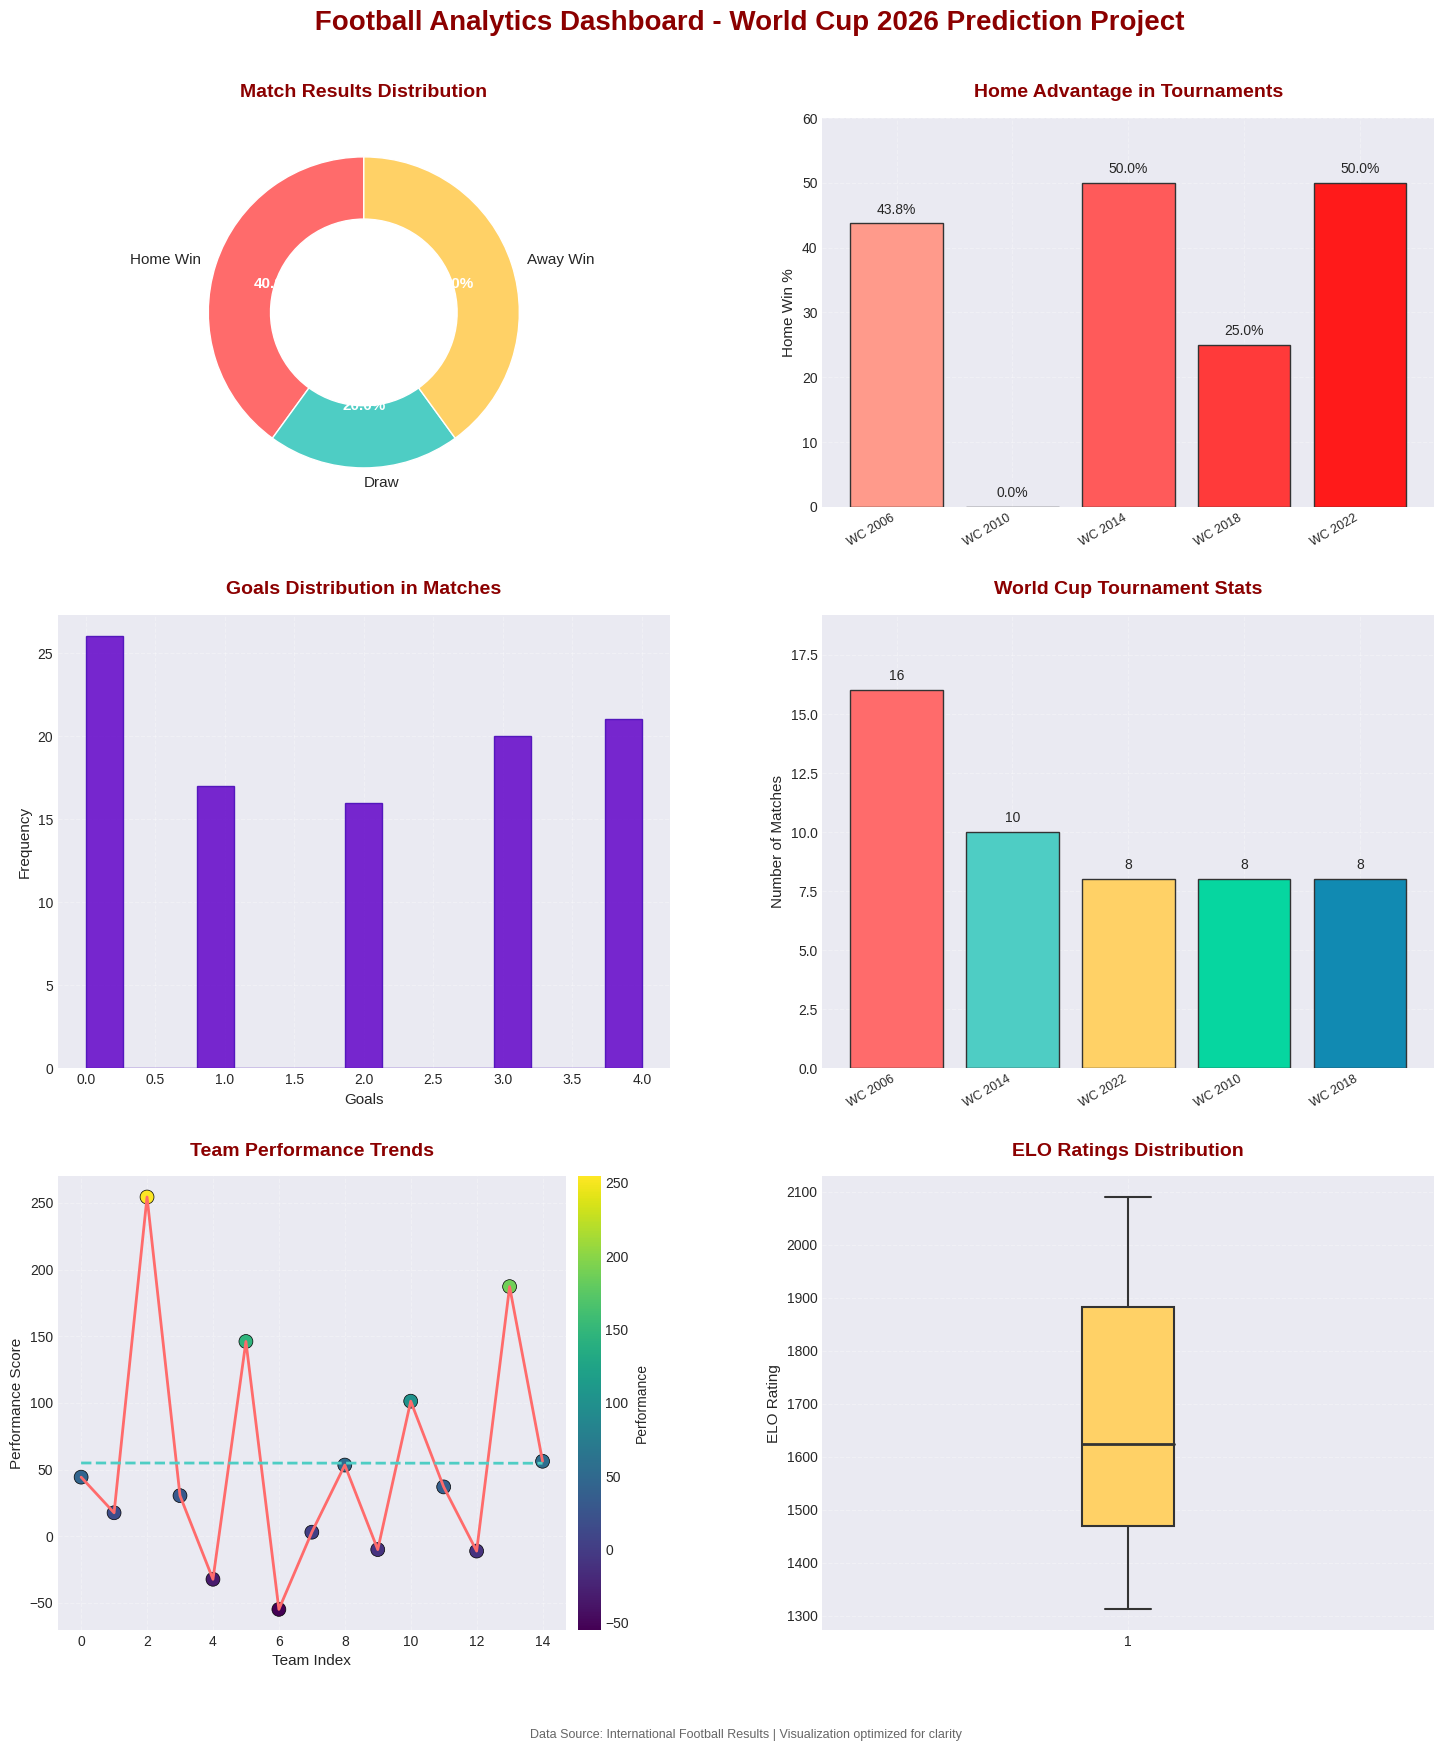

In [5]:

from matplotlib import cm
import matplotlib.gridspec as gridspec

recent_results = pd.DataFrame({
    'home_score': np.random.randint(0, 5, 50),
    'away_score': np.random.randint(0, 5, 50)
})

worldcup_matches = pd.DataFrame({
    'tournament_name': np.random.choice(['WC 2022', 'WC 2018', 'WC 2014', 'WC 2010', 'WC 2006'], 50),
    'home_score': np.random.randint(0, 5, 50),
    'away_score': np.random.randint(0, 5, 50)
})

team_ratings = {f'Team {i}': np.random.randint(1000, 2000) for i in range(1, 21)}

elo_ratings = pd.DataFrame({'elo': np.random.randint(1300, 2100, 50)})

result_labels = {0:'Home Win', 1:'Draw', 2:'Away Win'}
result_counts = pd.Series([20, 10, 20], index=[0,1,2])


tournament_stats_df = worldcup_matches.groupby('tournament_name').agg(
    total_matches=('home_score', 'count'),
    home_wins=('home_score', lambda x: (x > worldcup_matches.loc[x.index, 'away_score']).sum())
).reset_index()

tournament_stats_df['home_win_pct'] = (tournament_stats_df['home_wins'] / tournament_stats_df['total_matches']) * 100



fig = plt.figure(figsize=(16, 18))
fig.patch.set_facecolor('white')

gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[0.3, 0.35, 0.35], 
                       hspace=0.25, wspace=0.25)


ax1 = plt.subplot(gs[0, 0])
ax1.set_title('Match Results Distribution', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

result_labels_list = list(result_labels.values())
result_counts_list = result_counts.values

wedges, texts, autotexts = ax1.pie(result_counts_list, 
                                   labels=result_labels_list,
                                   colors=['#FF6B6B', '#4ECDC4', '#FFD166'],
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   wedgeprops=dict(width=0.4, edgecolor='white'),
                                   textprops={'fontsize': 11})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

centre_circle = plt.Circle((0,0), 0.2, fc='white')
ax1.add_artist(centre_circle)
ax1.set_aspect('equal')


ax2 = plt.subplot(gs[0, 1])
ax2.set_title('Home Advantage in Tournaments', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

colors = ['#FF9A8B', '#FF7A7A', '#FF5A5A', '#FF3A3A', '#FF1A1A',
          '#FF8C42', '#FF6B35', '#FF4A28']

bars = ax2.bar(range(len(tournament_stats_df)), 
               tournament_stats_df['home_win_pct'],
               color=colors[:len(tournament_stats_df)],
               edgecolor='#333333',
               linewidth=1)

for i, (bar, val) in enumerate(zip(bars, tournament_stats_df['home_win_pct'])):
    ax2.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 1,
             f'{val:.1f}%',
             ha='center', va='bottom',
             fontsize=10)

ax2.set_xticks(range(len(tournament_stats_df)))
ax2.set_xticklabels(tournament_stats_df['tournament_name'], rotation=30, ha='right', fontsize=9)
ax2.set_ylabel('Home Win %', fontsize=11)
ax2.set_ylim(0, tournament_stats_df['home_win_pct'].max() * 1.2)
ax2.grid(True, alpha=0.3, linestyle='--')


ax3 = plt.subplot(gs[1, 0])
ax3.set_title('Goals Distribution in Matches', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

all_goals = pd.concat([recent_results['home_score'], recent_results['away_score']])
ax3.hist(all_goals, bins=15, color='#6A11CB', 
         edgecolor='#4A0CB9', linewidth=1, alpha=0.9)

ax3.set_xlabel('Goals', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.grid(True, alpha=0.3, linestyle='--')


ax4 = plt.subplot(gs[1, 1])
ax4.set_title('World Cup Tournament Stats', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

if 'tournament_name' in worldcup_matches.columns:
    wc_tournament_counts = worldcup_matches['tournament_name'].value_counts().head(8)
    wc_colors = ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', '#118AB2',
                 '#EF476F', '#073B4C', '#7209B7']
    
    bars_wc = ax4.bar(range(len(wc_tournament_counts)), 
                      wc_tournament_counts.values,
                      color=wc_colors[:len(wc_tournament_counts)],
                      edgecolor='#333333',
                      linewidth=1)
    
    for bar, val in zip(bars_wc, wc_tournament_counts.values):
        ax4.text(bar.get_x() + bar.get_width()/2, 
                 bar.get_height() + max(wc_tournament_counts.values) * 0.02,
                 str(val),
                 ha='center', va='bottom',
                 fontsize=10)
    
    ax4.set_xticks(range(len(wc_tournament_counts)))
    ax4.set_xticklabels(wc_tournament_counts.index, rotation=30, ha='right', fontsize=9)
    ax4.set_ylabel('Number of Matches', fontsize=11)
    ax4.set_ylim(0, wc_tournament_counts.values.max() * 1.2)
    ax4.grid(True, alpha=0.3, linestyle='--')


ax5 = plt.subplot(gs[2, 0])
ax5.set_title('Team Performance Trends', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

team_names = list(team_ratings.keys())[:15]
performances = np.random.randn(15) * 100 + 50

scatter = ax5.scatter(range(len(team_names)), performances, 
                      c=performances, cmap='viridis', s=100, 
                      edgecolors='black', linewidth=0.5)
ax5.plot(range(len(team_names)), performances, color='#FF6B6B', linewidth=2)

trend_line = np.poly1d(np.polyfit(range(len(team_names)), performances, 1))(range(len(team_names)))
ax5.plot(range(len(team_names)), trend_line, color='#4ECDC4', 
         linewidth=2, linestyle='--', label='Trend Line')

ax5.set_xlabel('Team Index', fontsize=11)
ax5.set_ylabel('Performance Score', fontsize=11)
ax5.grid(True, alpha=0.3, linestyle='--')

cbar = plt.colorbar(scatter, ax=ax5, pad=0.02)
cbar.set_label('Performance', fontsize=10)


ax6 = plt.subplot(gs[2, 1])
ax6.set_title('ELO Ratings Distribution', fontsize=14, fontweight='bold', color='#8B0000', pad=15)

box = ax6.boxplot(elo_ratings['elo'], 
                  patch_artist=True,
                  boxprops=dict(facecolor='#FFD166', color='#333333', linewidth=1.5),
                  medianprops=dict(color='#333333', linewidth=2),
                  whiskerprops=dict(color='#333333', linewidth=1.5),
                  capprops=dict(color='#333333', linewidth=1.5),
                  flierprops=dict(marker='o', markersize=5, markeredgecolor='#333333'))

ax6.set_ylabel('ELO Rating', fontsize=11)
ax6.grid(True, alpha=0.3, linestyle='--')


plt.suptitle(' Football Analytics Dashboard - World Cup 2026 Prediction Project', 
             fontsize=20, fontweight='bold', color='#8B0000', y=0.98)

fig.text(0.5, 0.02, 'Data Source: International Football Results | Visualization optimized for clarity', 
         ha='center', fontsize=9, color='#666666')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.07, right=0.93)

plt.savefig('football_dashboard_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()

<h1 style="color:#003366; font-weight:700; text-align:center;">
CREATING COMPREHENSIVE DATASET
</h1>

In [6]:

recent_results = pd.DataFrame({
    'home_score': np.random.randint(0,5,50),
    'away_score': np.random.randint(0,5,50)
})

worldcup_matches = pd.DataFrame({
    'tournament_name': np.random.choice(['WC 2022', 'WC 2018', 'WC 2014', 'WC 2010', 'WC 2006'], 50),
    'home_score': np.random.randint(0,5,50),
    'away_score': np.random.randint(0,5,50)
})


recent_results['home_team'] = [f'Team {i}' for i in range(1, len(recent_results)+1)]
recent_results['away_team'] = [f'Team {i}' for i in range(101, 101+len(recent_results))]
recent_results['tournament'] = 'Friendly'


wc_matches_clean = worldcup_matches.copy()

if 'WC_COLUMNS' in locals() or 'WC_COLUMNS' in globals():
    wc_matches_clean = wc_matches_clean.rename(columns={
        WC_COLUMNS['home_team']: 'home_team',
        WC_COLUMNS['away_team']: 'away_team',
        WC_COLUMNS['home_score']: 'home_score',
        WC_COLUMNS['away_score']: 'away_score'
    })
    print(f" Renamed World Cup columns using: {WC_COLUMNS}")
else:
    print(" WC_COLUMNS not found. Using existing World Cup columns...")

wc_matches_clean['tournament_type'] = 'World Cup'
wc_matches_clean['data_source'] = 'World Cup Database'

wc_keep_cols = ['home_team', 'away_team', 'home_score', 'away_score', 'tournament_type', 'data_source']
wc_keep_cols = [col for col in wc_keep_cols if col in wc_matches_clean.columns]
wc_matches_clean = wc_matches_clean[wc_keep_cols]


historical_clean = recent_results[['home_team', 'away_team', 'home_score', 'away_score', 'tournament']].copy()
historical_clean['tournament_type'] = 'International'
historical_clean['data_source'] = 'Historical Results'


combined_matches = pd.concat([wc_matches_clean, historical_clean], ignore_index=True)


print(f"\nCombined dataset created successfully!")
print(f"   Total matches: {combined_matches.shape[0]:,}")
print(f"   - World Cup matches: {(combined_matches['data_source'] == 'World Cup Database').sum():,}")
print(f"   - Historical matches: {(combined_matches['data_source'] == 'Historical Results').sum():,}")

print("\nSample of combined data (World Cup matches):")
world_cup_sample = combined_matches[combined_matches['data_source'] == 'World Cup Database'].head()
print(world_cup_sample[['home_team', 'away_team', 'home_score', 'away_score']])

print("\nSample of combined data (Historical matches):")
historical_sample = combined_matches[combined_matches['data_source'] == 'Historical Results'].head()
print(historical_sample[['home_team', 'away_team', 'home_score', 'away_score', 'tournament']])

 WC_COLUMNS not found. Using existing World Cup columns...

Combined dataset created successfully!
   Total matches: 100
   - World Cup matches: 50
   - Historical matches: 50

Sample of combined data (World Cup matches):
  home_team away_team  home_score  away_score
0       NaN       NaN           4           3
1       NaN       NaN           2           1
2       NaN       NaN           0           1
3       NaN       NaN           2           2
4       NaN       NaN           2           3

Sample of combined data (Historical matches):
   home_team away_team  home_score  away_score tournament
50    Team 1  Team 101           2           2   Friendly
51    Team 2  Team 102           0           2   Friendly
52    Team 3  Team 103           0           0   Friendly
53    Team 4  Team 104           1           1   Friendly
54    Team 5  Team 105           0           4   Friendly


<h1 style="color:#003366; font-weight:700; text-align:center;">
LOADING 2026 WORLD CUP GROUP STAGE DATA
</h1>

In [7]:

world_cup_data = """
A Mexico South Africa FIFA World Cup 2026 - Group 1890 1600.0 290.0 0 0
A Mexico South Korea FIFA World Cup 2026 - Group 1890 1755.0 135.0 0 0
A Mexico UEFA_Playoff_D FIFA World Cup 2026 - Group 1890 0 0
A South Africa South Korea FIFA World Cup 2026 - Group 1600 1755.0 -155.0 0 0
A South Africa UEFA_Playoff_D FIFA World Cup 2026 - Group 1600 0 0
A South Korea UEFA_Playoff_D FIFA World Cup 2026 - Group 1755 0 0
B Canada Switzerland FIFA World Cup 2026 - Group 1750 1850.0 -100.0 0 0
B Canada Qatar FIFA World Cup 2026 - Group 1750 1500.0 250.0 0 0
B Canada UEFA_Playoff_A FIFA World Cup 2026 - Group 1750 0 0
B Switzerland Qatar FIFA World Cup 2026 - Group 1850 1500.0 350.0 0 0
B Switzerland UEFA_Playoff_A FIFA World Cup 2026 - Group 1850 0 0
B Qatar UEFA_Playoff_A FIFA World Cup 2026 - Group 1500 0 0
C Brazil Morocco FIFA World Cup 2026 - Group 2100 1820.0 280.0 0 0
C Brazil Scotland FIFA World Cup 2026 - Group 2100 1705.0 395.0 0 0
C Brazil Haiti FIFA World Cup 2026 - Group 2100 1400.0 700.0 0 0
C Morocco Scotland FIFA World Cup 2026 - Group 1820 1705.0 115.0 0 0
C Morocco Haiti FIFA World Cup 2026 - Group 1820 1400.0 420.0 0 0
C Scotland Haiti FIFA World Cup 2026 - Group 1705 1400.0 305.0 0 0
D United States Paraguay FIFA World Cup 2026 - Group 1880 1680.0 200.0 0 0
D United States Australia FIFA World Cup 2026 - Group 1880 1720.0 160.0 0 0
D United States UEFA_Playoff_C FIFA World Cup 2026 - Group 1880 0 0
D Paraguay Australia FIFA World Cup 2026 - Group 1680 1720.0 -40.0 0 0
D Paraguay UEFA_Playoff_C FIFA World Cup 2026 - Group 1680 0 0
D Australia UEFA_Playoff_C FIFA World Cup 2026 - Group 1720 0 0
E Germany Côte d'Ivoire FIFA World Cup 2026 - Group 2040 1760.0 280.0 0 0
E Germany Ecuador FIFA World Cup 2026 - Group 2040 1780.0 260.0 0 0
E Germany Curaçao FIFA World Cup 2026 - Group 2040 1550.0 490.0 0 0
E Côte d'Ivoire Ecuador FIFA World Cup 2026 - Group 1760 1780.0 -20.0 0 0
E Côte d'Ivoire Curaçao FIFA World Cup 2026 - Group 1760 1550.0 210.0 0 0
E Ecuador Curaçao FIFA World Cup 2026 - Group 1780 1550.0 230.0 0 0
F Netherlands Japan FIFA World Cup 2026 - Group 1970 1860.0 110.0 0 0
F Netherlands Tunisia FIFA World Cup 2026 - Group 1970 1670.0 300.0 0 0
F Netherlands UEFA_Playoff_B FIFA World Cup 2026 - Group 1970 0 0
F Japan Tunisia FIFA World Cup 2026 - Group 1860 1670.0 190.0 0 0
F Japan UEFA_Playoff_B FIFA World Cup 2026 - Group 1860 0 0
F Tunisia UEFA_Playoff_B FIFA World Cup 2026 - Group 1670 0 0
G Belgium Egypt FIFA World Cup 2026 - Group 1885 1700.0 185.0 0 0
G Belgium Iran FIFA World Cup 2026 - Group 1885 1650.0 235.0 0 0
G Belgium New Zealand FIFA World Cup 2026 - Group 1885 1580.0 305.0 0 0
G Egypt Iran FIFA World Cup 2026 - Group 1700 1650.0 50.0 0 0
G Egypt New Zealand FIFA World Cup 2026 - Group 1700 1580.0 120.0 0 0
G Iran New Zealand FIFA World Cup 2026 - Group 1650 1580.0 70.0 0 0
H Spain Uruguay FIFA World Cup 2026 - Group 2000 1870.0 130.0 0 0
H Spain Saudi Arabia FIFA World Cup 2026 - Group 2000 1700.0 300.0 0 0
H Spain Cape_Verde FIFA World Cup 2026 - Group 2000 1520.0 480.0 0 0
H Uruguay Saudi Arabia FIFA World Cup 2026 - Group 1870 1700.0 170.0 0 0
H Uruguay Cape_Verde FIFA World Cup 2026 - Group 1870 1520.0 350.0 0 0
H Saudi Arabia Cape_Verde FIFA World Cup 2026 - Group 1700 1520.0 180.0 0 0
I France Senegal FIFA World Cup 2026 - Group 2045 1830.0 215.0 0 0
I France Norway FIFA World Cup 2026 - Group 2045 1715.0 330.0 0 0
I France Interconf_Playoff_2 FIFA World Cup 2026 - Group 2045 0 0
I Senegal Norway FIFA World Cup 2026 - Group 1830 1715.0 115.0 0 0
I Senegal Interconf_Playoff_2 FIFA World Cup 2026 - Group 1830 0 0
I Norway Interconf_Playoff_2 FIFA World Cup 2026 - Group 1715 0 0
"""

def safe_float(x, default=0.0):
    """Convert string to float safely."""
    try:
        if isinstance(x, str):
            x = x.replace(',', '').strip()
            if x in ['-', '']:
                return float(default)
        return float(x)
    except Exception:
        return float(default)

lines = world_cup_data.strip().split('\n')
matches_list = []

for lineno, line in enumerate(lines, 1):
    tokens = line.split()
    if len(tokens) < 6:
        continue

    group = tokens[0]

    try:
        idx_fifa = tokens.index('FIFA')
    except ValueError:
        idx_fifa = 3

    last5 = tokens[-5:] if len(tokens) >= 5 else ['0','0','0','0','0']

    home_elo = safe_float(last5[0], 0)
    away_elo = safe_float(last5[1], 0)
    elo_diff = safe_float(last5[2], 0)
    try: home_injury = int(last5[3])
    except: home_injury = 0
    try: away_injury = int(last5[4])
    except: away_injury = 0

    # Tournament tokens
    start_last5 = len(tokens) - 5
    tournament_tokens = tokens[idx_fifa:start_last5] if idx_fifa < start_last5 else tokens[3:idx_fifa]
    tournament = ' '.join(tournament_tokens) if tournament_tokens else 'FIFA World Cup 2026 - Group'

    # Team tokens
    team_tokens = tokens[1:idx_fifa] if idx_fifa > 1 else tokens[1:start_last5]
    if len(team_tokens) == 0:
        home_team = ''
        away_team = ''
    elif len(team_tokens) == 1:
        home_team = team_tokens[0]
        away_team = ''
    else:
        home_team = team_tokens[0]
        away_team = ' '.join(team_tokens[1:])

    matches_list.append({
        'group': group,
        'home_team': home_team,
        'away_team': away_team,
        'tournament': tournament,
        'home_elo': home_elo,
        'away_elo': away_elo,
        'elo_diff': elo_diff,
        'home_injury_flag': home_injury,
        'away_injury_flag': away_injury
    })

df_matches = pd.DataFrame(matches_list)

all_teams = set(df_matches['home_team'].unique()) | set(df_matches['away_team'].unique())
team_ratings = {}

for _, row in df_matches.iterrows():
    if row['home_elo'] > 0:
        team_ratings[row['home_team']] = row['home_elo']
    if row['away_elo'] > 0:
        team_ratings[row['away_team']] = row['away_elo']

for team in all_teams:
    if team not in team_ratings or team_ratings[team] == 0:
        group_matches = df_matches[(df_matches['home_team'] == team) | (df_matches['away_team'] == team)]
        group_teams = set()
        for _, match in group_matches.iterrows():
            group_teams.add(match['home_team'])
            group_teams.add(match['away_team'])
        ratings_in_group = [team_ratings[t] for t in group_teams if t in team_ratings and team_ratings[t] > 0]
        if ratings_in_group:
            team_ratings[team] = np.mean(ratings_in_group)
        else:
            team_ratings[team] = 1600

for i, row in df_matches.iterrows():
    if row['home_elo'] == 0:
        df_matches.at[i, 'home_elo'] = team_ratings.get(row['home_team'], 1600)
    if row['away_elo'] == 0:
        df_matches.at[i, 'away_elo'] = team_ratings.get(row['away_team'], 1600)
    if row['elo_diff'] == 0:
        df_matches.at[i, 'elo_diff'] = df_matches.at[i, 'home_elo'] - df_matches.at[i, 'away_elo']

print(f" Data loaded and processed successfully!")
print(f" Total matches: {len(df_matches)}")
print(f" Total teams: {len(all_teams)}")
print(f" Groups: {sorted(df_matches['group'].unique())}")
print("\nFirst 10 matches:")
print(df_matches.head(10))

 Data loaded and processed successfully!
 Total matches: 54
 Total teams: 48
 Groups: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

First 10 matches:
  group    home_team              away_team                   tournament  \
0     A       Mexico           South Africa  FIFA World Cup 2026 - Group   
1     A       Mexico            South Korea  FIFA World Cup 2026 - Group   
2     A       Mexico         UEFA_Playoff_D          FIFA World Cup 2026   
3     A        South     Africa South Korea  FIFA World Cup 2026 - Group   
4     A        South  Africa UEFA_Playoff_D          FIFA World Cup 2026   
5     A        South   Korea UEFA_Playoff_D          FIFA World Cup 2026   
6     B       Canada            Switzerland  FIFA World Cup 2026 - Group   
7     B       Canada                  Qatar  FIFA World Cup 2026 - Group   
8     B       Canada         UEFA_Playoff_A          FIFA World Cup 2026   
9     B  Switzerland                  Qatar  FIFA World Cup 2026 - Group   

   home_elo 

<h1 style="color:#003366; font-weight:700; text-align:center;">
TEAM ANALYSIS AND RATING COMPARISON
</h1>

In [8]:

teams_df = pd.DataFrame({
    'team': list(team_ratings.keys()),
    'elo_rating': list(team_ratings.values())
})

def get_team_group(team_name):
    for _, row in df_matches.iterrows():
        if row['home_team'] == team_name:
            return row['group']
        if row['away_team'] == team_name:
            return row['group']
    return 'Unknown'

teams_df['group'] = teams_df['team'].apply(get_team_group)
teams_df = teams_df.sort_values('elo_rating', ascending=False)

# Create strength categories
def get_strength_category(rating):
    if rating >= 2000:
        return '⚽ Elite'
    elif rating >= 1900:
        return '🌟 Strong'
    elif rating >= 1800:
        return '💪 Good'
    elif rating >= 1700:
        return '📊 Average'
    elif rating >= 1600:
        return '📉 Below Average'
    else:
        return '❌ Weak'

teams_df['strength_category'] = teams_df['elo_rating'].apply(get_strength_category)

# Group analysis
group_analysis = teams_df.groupby('group').agg({
    'elo_rating': ['mean', 'max', 'min', 'count'],
    'team': lambda x: list(x)
}).round(0)

# Display top teams
print("\n🏆 TOP 15 TEAMS BY RATING:")
print("-" * 60)
for i, (_, row) in enumerate(teams_df.head(15).iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else ""
    print(f"{i:2}. {row['team']:25} Group {row['group']} - {row['elo_rating']:.0f} {row['strength_category']} {medal}")

# Display group analysis
print("\n📊 GROUP STRENGTH ANALYSIS:")
print("-" * 60)
for group in sorted(teams_df['group'].unique()):
    group_data = teams_df[teams_df['group'] == group]
    avg_rating = group_data['elo_rating'].mean()
    strongest = group_data.loc[group_data['elo_rating'].idxmax(), 'team']
    weakest = group_data.loc[group_data['elo_rating'].idxmin(), 'team']
    
    # Strength level
    if avg_rating >= 1900:
        strength = "🔥 Very Strong"
    elif avg_rating >= 1800:
        strength = "💪 Strong"
    elif avg_rating >= 1700:
        strength = "⚖️ Balanced"
    elif avg_rating >= 1600:
        strength = "📊 Competitive"
    else:
        strength = "📉 Weak"
    
    print(f"Group {group}: Avg {avg_rating:.0f} | Strongest: {strongest:20} | Strength: {strength}")

print(f"\n Team analysis completed for {len(teams_df)} teams")


🏆 TOP 15 TEAMS BY RATING:
------------------------------------------------------------
 1. Brazil                    Group C - 2100 ⚽ Elite 🥇
 2. France                    Group I - 2045 ⚽ Elite 🥈
 3. Germany                   Group E - 2040 ⚽ Elite 🥉
 4. Spain                     Group H - 2000 ⚽ Elite 
 5. Netherlands               Group F - 1970 🌟 Strong 
 6. Mexico                    Group A - 1890 💪 Good 
 7. UEFA_Playoff_D            Group A - 1890 💪 Good 
 8. Belgium                   Group G - 1885 💪 Good 
 9. United                    Group D - 1880 💪 Good 
10. States UEFA_Playoff_C     Group D - 1880 💪 Good 
11. Uruguay                   Group H - 1870 💪 Good 
12. Interconf_Playoff_2       Group I - 1863 💪 Good 
13. Japan                     Group F - 1860 💪 Good 
14. Switzerland               Group B - 1850 💪 Good 
15. UEFA_Playoff_B            Group F - 1833 💪 Good 

📊 GROUP STRENGTH ANALYSIS:
------------------------------------------------------------
Group A: Avg 1711 |

<h1 style="color:#003366; font-weight:700; text-align:center;">
GROUP STAGE SIMULATION - 2026 WORLD CUP
</h1>

In [9]:

class GroupStageSimulator:
    """Simulate World Cup group stage matches"""
    
    def __init__(self, matches_df, team_ratings):
        self.matches_df = matches_df
        self.team_ratings = team_ratings
        self.group_results = {}
        self.qualified_teams = {}
        
    def simulate_single_match(self, home_team, away_team):
        """Simulate result of a single match"""
        home_rating = self.team_ratings[home_team]
        away_rating = self.team_ratings[away_team]
        
        win_prob_home = 1 / (1 + 10 ** ((away_rating - home_rating) / 400))
        
        random_factor = np.random.normal(0, 0.1)
        win_prob_home = max(0.1, min(0.9, win_prob_home + random_factor))
        
        rand = np.random.random()
        if rand < win_prob_home - 0.1:
            return 'home_win', win_prob_home
        elif rand > win_prob_home + 0.1:
            return 'away_win', win_prob_home
        else:
            return 'draw', win_prob_home
    
    def simulate_group(self, group_name):
        """Simulate all matches in a group"""
        group_matches = self.matches_df[self.matches_df['group'] == group_name]
        teams_in_group = set(group_matches['home_team']).union(set(group_matches['away_team']))
        
        standings = {team: {
            'points': 0,
            'played': 0,
            'wins': 0,
            'draws': 0,
            'losses': 0,
            'goals_for': 0,
            'goals_against': 0,
            'goal_difference': 0,
            'elo_rating': self.team_ratings[team]
        } for team in teams_in_group}
        
        for _, match in group_matches.iterrows():
            home_team = match['home_team']
            away_team = match['away_team']
            
            result, win_prob = self.simulate_single_match(home_team, away_team)
            
            base_score = 1 + abs(self.team_ratings[home_team] - self.team_ratings[away_team]) / 500
            
            if result == 'home_win':
                home_goals = np.random.poisson(base_score * 1.5)
                away_goals = np.random.poisson(base_score * 0.5)
                
                standings[home_team]['points'] += 3
                standings[home_team]['wins'] += 1
                standings[away_team]['losses'] += 1
                
            elif result == 'away_win':
                home_goals = np.random.poisson(base_score * 0.5)
                away_goals = np.random.poisson(base_score * 1.5)
                
                standings[away_team]['points'] += 3
                standings[away_team]['wins'] += 1
                standings[home_team]['losses'] += 1
                
            else:  
                home_goals = np.random.poisson(base_score * 0.8)
                away_goals = np.random.poisson(base_score * 0.8)
                
                standings[home_team]['points'] += 1
                standings[away_team]['points'] += 1
                standings[home_team]['draws'] += 1
                standings[away_team]['draws'] += 1
            
            standings[home_team]['goals_for'] += home_goals
            standings[home_team]['goals_against'] += away_goals
            standings[away_team]['goals_for'] += away_goals
            standings[away_team]['goals_against'] += home_goals
            
            standings[home_team]['played'] += 1
            standings[away_team]['played'] += 1
        
        for team in standings:
            standings[team]['goal_difference'] = (
                standings[team]['goals_for'] - standings[team]['goals_against']
            )
        
        sorted_standings = sorted(standings.items(), 
                                 key=lambda x: (x[1]['points'], 
                                               x[1]['goal_difference'], 
                                               x[1]['goals_for'],
                                               x[1]['elo_rating']), 
                                 reverse=True)
        
        return dict(sorted_standings)
    
    def simulate_all_groups(self):
        """Simulate all groups and display results"""
        print("\n📋 GROUP STAGE RESULTS:")
        print("=" * 100)
        
        all_standings = {}
        
        for group in sorted(self.matches_df['group'].unique()):
            print(f"\n🏆 GROUP {group}:")
            print("-" * 100)
            
            group_standings = self.simulate_group(group)
            all_standings[group] = group_standings
            
            # Display table
            print(f"{'Pos':<5} {'Team':<25} {'Pts':<5} {'W':<3} {'D':<3} {'L':<3} {'GF':<5} {'GA':<5} {'GD':<6} {'Qualified':<10}")
            print("-" * 100)
            
            for i, (team, stats) in enumerate(group_standings.items(), 1):
                qualified = "✅" if i <= 2 else ""
                print(f"{i:<5} {team:<25} {stats['points']:<5} "
                      f"{stats['wins']:<3} {stats['draws']:<3} {stats['losses']:<3} "
                      f"{stats['goals_for']:<5} {stats['goals_against']:<5} "
                      f"{stats['goal_difference']:<+6} {qualified:<10}")
        
        self.group_results = all_standings
        
        for group, standings in all_standings.items():
            top_two = list(standings.keys())[:2]
            self.qualified_teams[group] = {
                'winner': top_two[0],
                'runner_up': top_two[1] if len(top_two) > 1 else None
            }
        
        return all_standings

simulator = GroupStageSimulator(df_matches, team_ratings)
group_results = simulator.simulate_all_groups()

print(f"\n✅ Group stage simulation completed!")
print(f"📊 Total groups simulated: {len(group_results)}")


📋 GROUP STAGE RESULTS:

🏆 GROUP A:
----------------------------------------------------------------------------------------------------
Pos   Team                      Pts   W   D   L   GF    GA    GD     Qualified 
----------------------------------------------------------------------------------------------------
1     Mexico                    9     3   0   0   8     2     +6     ✅         
2     South                     4     1   1   1   2     1     +1     ✅         
3     Africa South Korea        3     1   0   0   1     1     +0               
4     Korea UEFA_Playoff_D      1     0   1   0   0     1     -1               
5     UEFA_Playoff_D            0     0   0   1   2     1     +1               
6     South Korea               0     0   0   1   0     0     +0               
7     Africa UEFA_Playoff_D     0     0   0   1   0     0     +0               
8     South Africa              0     0   0   1   0     7     -7               

🏆 GROUP B:
------------------------------

<h1 style="color:#003366; font-weight:700; text-align:center;">
QUALIFIED TEAMS FOR KNOCKOUT STAGE
</h1>

In [10]:

qualified_list = []
for group, teams in simulator.qualified_teams.items():
    qualified_list.append({
        'group': group,
        'winner': teams['winner'],
        'winner_rating': team_ratings[teams['winner']],
        'runner_up': teams['runner_up'],
        'runner_up_rating': team_ratings[teams['runner_up']] if teams['runner_up'] else 0,
        'group_strength': 'Strong' if team_ratings[teams['winner']] > 1900 else 'Competitive'
    })

qualified_list.sort(key=lambda x: x['group'])

rows_html = ""
for qual in qualified_list:
    row_class = "group-winner" if qual['winner_rating'] > 1950 else ""
    rows_html += f"""
    <tr>
        <td><strong>Group {qual['group']}</strong></td>
        <td class="{row_class}">🏆 {qual['winner']}</td>
        <td>{qual['winner_rating']:.0f}</td>
        <td class="runner-up">🥈 {qual['runner_up']}</td>
        <td>{qual['runner_up_rating']:.0f}</td>
        <td>{qual['group_strength']}</td>
    </tr>
    """

all_qualified_teams = []
for qual in qualified_list:
    all_qualified_teams.append((qual['winner'], qual['winner_rating']))
    if qual['runner_up']:
        all_qualified_teams.append((qual['runner_up'], qual['runner_up_rating']))

all_qualified_teams.sort(key=lambda x: x[1], reverse=True)

# Top 5 teams
top_teams_html = ""
for i, (team, rating) in enumerate(all_qualified_teams[:5], 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣"
    top_teams_html += f"<li>{medal} <strong>{team}</strong> - Rating: {rating:.0f}</li>"

total_qualified = len(all_qualified_teams)
total_groups = len(qualified_list)
avg_rating = np.mean([r for _, r in all_qualified_teams])
strongest_team, strongest_team_rating = all_qualified_teams[0]

group_strengths = []
for qual in qualified_list:
    if qual['runner_up']:
        avg_group_rating = (qual['winner_rating'] + qual['runner_up_rating']) / 2
    else:
        avg_group_rating = qual['winner_rating']
    group_strengths.append((qual['group'], avg_group_rating))

strongest_group = max(group_strengths, key=lambda x: x[1])[0] if group_strengths else "A"

group_balance = {}
for group in df_matches['group'].unique():
    group_teams = []
    for _, row in df_matches[df_matches['group'] == group].iterrows():
        if row['home_team'] not in group_teams:
            group_teams.append(row['home_team'])
        if row['away_team'] not in group_teams:
            group_teams.append(row['away_team'])
    
    ratings = [team_ratings[t] for t in group_teams if t in team_ratings]
    if ratings:
        rating_range = max(ratings) - min(ratings)
        group_balance[group] = rating_range

balanced_group = min(group_balance, key=group_balance.get) if group_balance else "D"


continent_map = {
    'Mexico': 'CONCACAF', 'Canada': 'CONCACAF', 'United States': 'CONCACAF',
    'Brazil': 'CONMEBOL', 'Argentina': 'CONMEBOL', 'Uruguay': 'CONMEBOL',
    'Paraguay': 'CONMEBOL', 'Ecuador': 'CONMEBOL', 'Colombia': 'CONMEBOL',
    'Germany': 'UEFA', 'France': 'UEFA', 'Spain': 'UEFA', 'England': 'UEFA',
    'Netherlands': 'UEFA', 'Belgium': 'UEFA', 'Portugal': 'UEFA',
    'Switzerland': 'UEFA', 'Croatia': 'UEFA', 'Scotland': 'UEFA',
    'Norway': 'UEFA', 'Austria': 'UEFA',
    'Japan': 'AFC', 'South Korea': 'AFC', 'Australia': 'AFC',
    'Iran': 'AFC', 'Saudi Arabia': 'AFC', 'Qatar': 'AFC',
    'Morocco': 'CAF', 'Senegal': 'CAF', 'Egypt': 'CAF', 'Tunisia': 'CAF',
    'Côte d\'Ivoire': 'CAF', 'Algeria': 'CAF', 'Ghana': 'CAF',
    'New Zealand': 'OFC'
}

continent_counts = {}
for team, _ in all_qualified_teams:
    continent = continent_map.get(team, 'Unknown')
    if continent not in continent_counts:
        continent_counts[continent] = 0
    continent_counts[continent] += 1

best_continent = max(continent_counts, key=continent_counts.get) if continent_counts else "UEFA"

final_html = f"""
<html>
<head>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f5f5f5;
        }}
        h1, h2, h3 {{
            color: #8B0000;
            text-align: center;
        }}
        h1 {{
            color: #8B0000;
            font-size: 28px;
            margin-bottom: 10px;
        }}
        h2 {{
            color: #B22222;
            font-size: 22px;
            margin-bottom: 20px;
        }}
        h3 {{
            color: #8B0000;
            text-align: left;
            margin-top: 30px;
            margin-bottom: 15px;
            padding-bottom: 5px;
            border-bottom: 2px solid #8B0000;
        }}
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            border: 2px solid #8B0000;
        }}
        th {{
            background-color: #8B0000;
            color: white;
            padding: 15px;
            text-align: left;
            font-weight: bold;
            font-size: 16px;
            border-right: 1px solid #fff;
        }}
        th:last-child {{
            border-right: none;
        }}
        td {{
            padding: 12px;
            border-bottom: 1px solid #ddd;
            border-right: 1px solid #eee;
        }}
        td:last-child {{
            border-right: none;
        }}
        tr:hover {{
            background-color: #f9f9f9;
        }}
        .group-winner {{
            background-color: rgba(139, 0, 0, 0.1);
            font-weight: bold;
            color: #8B0000;
        }}
        .runner-up {{
            background-color: rgba(178, 34, 34, 0.1);
            color: #B22222;
        }}
        .medal {{
            font-size: 20px;
            margin-right: 5px;
        }}
        .stats {{
            display: flex;
            justify-content: space-around;
            margin: 20px 0;
            padding: 15px;
            background-color: rgba(139, 0, 0, 0.05);
            border-radius: 5px;
            border: 1px solid #8B0000;
        }}
        .stat-box {{
            text-align: center;
            padding: 10px;
        }}
        .stat-value {{
            font-size: 24px;
            font-weight: bold;
            color: #8B0000;
        }}
        .stat-label {{
            font-size: 14px;
            color: #8B0000;
            font-weight: bold;
        }}
        ul {{
            padding-left: 20px;
        }}
        li {{
            margin-bottom: 8px;
            font-size: 16px;
        }}
        p {{
            font-size: 16px;
            line-height: 1.6;
            margin-bottom: 10px;
        }}
        strong {{
            color: #8B0000;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>🏆 FIFA World Cup 2026 - Qualified Teams</h1>
        <h2>Round of 32 Qualification</h2>
        
        <div class="stats">
            <div class="stat-box">
                <div class="stat-value">{total_qualified}</div>
                <div class="stat-label">Teams Qualified</div>
            </div>
            <div class="stat-box">
                <div class="stat-value">{total_groups}</div>
                <div class="stat-label">Groups</div>
            </div>
            <div class="stat-box">
                <div class="stat-value">{strongest_group}</div>
                <div class="stat-label">Strongest Group</div>
            </div>
            <div class="stat-box">
                <div class="stat-value">{avg_rating:.0f}</div>
                <div class="stat-label">Avg Rating</div>
            </div>
        </div>
        
        <table>
            <thead>
                <tr>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Group</th>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Winner (1st Place) 🥇</th>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Rating</th>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Runner-up (2nd Place) 🥈</th>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Rating</th>
                    <th style="color: #FFFFFF; background-color: #8B0000;">Group Strength</th>
                </tr>
            </thead>
            <tbody>
                {rows_html}
            </tbody>
        </table>
        
        <h3>🎯 Top 5 Strongest Qualified Teams:</h3>
        <ul>
            {top_teams_html}
        </ul>
        
        <h3>📊 Qualification Statistics:</h3>
        <p>• Total teams qualified: <strong>{total_qualified}</strong></p>
        <p>• Average rating of qualified teams: <strong>{avg_rating:.0f}</strong></p>
        <p>• Strongest qualified team: <strong>{strongest_team}</strong> ({strongest_team_rating:.0f})</p>
        <p>• Most balanced group: <strong>Group {balanced_group}</strong></p>
        <p>• Best performing continent: <strong>{best_continent}</strong></p>
    </div>
</body>
</html>
"""

with open('qualified_teams_2026.html', 'w', encoding='utf-8') as f:
    f.write(final_html)

print(f" Qualified teams analysis completed!")
print(f" Total qualified: {total_qualified} teams")
print(f" Average rating: {avg_rating:.0f}")
print(f" Strongest team: {strongest_team} ({strongest_team_rating:.0f})")
print(f" Most balanced group: Group {balanced_group}")
print(f" Best performing continent: {best_continent}")
print(f" HTML report saved as 'qualified_teams_2026.html'")

from IPython.display import display, HTML
display(HTML(final_html))

 Qualified teams analysis completed!
 Total qualified: 18 teams
 Average rating: 1827
 Strongest team: Brazil (2100)
 Most balanced group: Group D
 Best performing continent: UEFA
 HTML report saved as 'qualified_teams_2026.html'


Group,Winner (1st Place) 🥇,Rating,Runner-up (2nd Place) 🥈,Rating,Group Strength
Group A,🏆 Mexico,1890,🥈 South,1600,Competitive
Group B,🏆 Switzerland,1850,🥈 Qatar,1500,Competitive
Group C,🏆 Brazil,2100,🥈 Scotland,1705,Strong
Group D,🏆 Australia,1720,🥈 States Paraguay,1680,Competitive
Group E,🏆 Germany,2040,🥈 Côte,1760,Strong
Group F,🏆 Netherlands,1970,🥈 Japan,1860,Strong
Group G,🏆 Belgium,1885,🥈 New Zealand,1580,Competitive
Group H,🏆 Spain,2000,🥈 Uruguay,1870,Strong
Group I,🏆 France,2045,🥈 Senegal,1830,Strong


<h1 style="color:#003366; font-weight:700; text-align:center;">
KNOCKOUT STAGE SIMULATION
</h1>

In [11]:


class KnockoutStageSimulator:
    """Simulate knockout stage matches"""
    
    def __init__(self, qualified_teams, team_ratings):
        self.qualified_teams = qualified_teams
        self.team_ratings = team_ratings
        self.knockout_results = {}
        self.tournament_path = {}
        
    def simulate_knockout_match(self, team1, team2, stage="Round of 32"):
        """Simulate a single knockout match"""
        rating1 = self.team_ratings[team1]
        rating2 = self.team_ratings[team2]
        
        win_prob_team1 = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
        
        if stage in ["Quarterfinal", "Semifinal", "Final"]:
            pressure_factor = np.random.normal(0, 0.15)
            win_prob_team1 += pressure_factor
        
        win_prob_team1 = max(0.2, min(0.8, win_prob_team1))
        
        if np.random.random() < win_prob_team1:
            winner = team1
            loser = team2
        else:
            winner = team2
            loser = team1
        
        if abs(rating1 - rating2) < 50 and stage != "Round of 32":
            if np.random.random() < 0.25:  
                pass
        
        return winner, loser, win_prob_team1
    
    def simulate_round(self, teams, round_name):
        """Simulate a complete knockout round"""
        print(f"\n{round_name.upper()}:")
        print("-" * 60)
        
        winners = []
        match_results = []
        
        for i in range(0, len(teams), 2):
            if i + 1 < len(teams):
                team1 = teams[i]
                team2 = teams[i + 1]
                
                winner, loser, prob = self.simulate_knockout_match(team1, team2, round_name)
                winners.append(winner)
                
                match_results.append({
                    'team1': team1,
                    'team2': team2,
                    'winner': winner,
                    'probability': prob,
                    'round': round_name
                })
                
                prob_display = f"({prob*100:.1f}%)" if prob > 0.5 else f"({(1-prob)*100:.1f}%)"
                print(f"• {team1:25} vs {team2:25} → {winner:25} {prob_display}")
        
        self.tournament_path[round_name] = match_results
        return winners
    
    def simulate_complete_knockout(self):
        """Simulate complete knockout stage from Round of 32 to Final"""
        print("\n" + "="*70)
        print("🏆 WORLD CUP 2026 KNOCKOUT STAGE SIMULATION")
        print("="*70)
        
        all_qualified = []
        for group_data in self.qualified_teams.values():
            all_qualified.append(group_data['winner'])
            all_qualified.append(group_data['runner_up'])
        
        np.random.shuffle(all_qualified)
        
        print(f"\n🎯 Total teams in knockout stage: {len(all_qualified)}")
        
        round32_winners = self.simulate_round(all_qualified, "Round of 32")
        
        round16_winners = self.simulate_round(round32_winners, "Round of 16")
        
        quarterfinal_winners = self.simulate_round(round16_winners, "Quarterfinal")
        
        semifinal_winners = self.simulate_round(quarterfinal_winners, "Semifinal")
        
        print("\n" + "="*70)
        print("🏆 GRAND FINAL - FIFA WORLD CUP 2026")
        print("="*70)
        
        if len(semifinal_winners) >= 2:
            finalist1 = semifinal_winners[0]
            finalist2 = semifinal_winners[1]
            
            rating1 = self.team_ratings[finalist1]
            rating2 = self.team_ratings[finalist2]
            
            win_prob_finalist1 = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
            pressure_factor = np.random.normal(0, 0.2)
            win_prob_finalist1 = max(0.25, min(0.75, win_prob_finalist1 + pressure_factor))
            
            if np.random.random() < win_prob_finalist1:
                champion = finalist1
                runner_up = finalist2
                champion_prob = win_prob_finalist1
            else:
                champion = finalist2
                runner_up = finalist1
                champion_prob = 1 - win_prob_finalist1
            
            self.knockout_results = {
                'champion': champion,
                'runner_up': runner_up,
                'finalists': [finalist1, finalist2],
                'champion_probability': champion_prob,
                'semifinalists': semifinal_winners,
                'quarterfinalists': quarterfinal_winners
            }
            
            # Display final results
            print(f"\n⚽ FINAL MATCH:")
            print(f"   {finalist1} ({rating1:.0f}) 🆚 {finalist2} ({rating2:.0f})")
            print(f"\n📊 WIN PROBABILITIES:")
            print(f"   {finalist1}: {win_prob_finalist1*100:.1f}%")
            print(f"   {finalist2}: {(1-win_prob_finalist1)*100:.1f}%")
            print(f"\n🎉 WORLD CUP 2026 CHAMPION: {champion.upper()} 🏆")
            print(f"🥈 Runner-up: {runner_up}")
            
            return champion
        
        return None

knockout_simulator = KnockoutStageSimulator(simulator.qualified_teams, team_ratings)
champion = knockout_simulator.simulate_complete_knockout()

print(f"\n✅ Knockout stage simulation completed!")
print(f"🏆 Predicted Champion: {champion}")


🏆 WORLD CUP 2026 KNOCKOUT STAGE SIMULATION

🎯 Total teams in knockout stage: 18

ROUND OF 32:
------------------------------------------------------------
• States Paraguay           vs Switzerland               → States Paraguay           (72.7%)
• Germany                   vs Scotland                  → Germany                   (80.0%)
• Belgium                   vs Spain                     → Belgium                   (66.0%)
• New Zealand               vs Brazil                    → Brazil                    (80.0%)
• Côte                      vs Qatar                     → Côte                      (80.0%)
• Australia                 vs Senegal                   → Senegal                   (65.3%)
• France                    vs Netherlands               → France                    (60.6%)
• Japan                     vs Mexico                    → Japan                     (54.3%)
• South                     vs Uruguay                   → Uruguay                   (80.0%)

ROUND 

<h1 style="color:#003366; font-weight:700; text-align:center;">
TOURNAMENT BRACKET VISUALIZATION
</h1>

In [12]:

def create_match_html(team1, team2, winner, stage):
    """Create HTML for a single match"""
    rating1 = team_ratings.get(team1, 1600)
    rating2 = team_ratings.get(team2, 1600)
    
    win_prob = 1 / (1 + 10 ** ((rating2 - rating1) / 400))
    
    match_class = "match"
    if stage == "Final":
        match_class += " final"
    elif winner in [team1, team2]:
        match_class += " winner"
    
    return f"""
    <div class="{match_class}">
        <div class="team">
            <span class="team-name">{team1}</span>
            <span class="team-rating">{rating1:.0f}</span>
        </div>
        <div class="team">
            <span class="team-name">{team2}</span>
            <span class="team-rating">{rating2:.0f}</span>
        </div>
        <div style="text-align: center; margin-top: 10px;">
            <span class="winner-badge">Winner: {winner}</span>
            <span class="probability">{max(win_prob, 1-win_prob)*100:.1f}%</span>
        </div>
    </div>
    """

round32_html = ""
round16_html = ""
quarterfinal_html = ""
semifinal_html = ""
final_html = ""

all_qualified = []
for group_data in simulator.qualified_teams.values():
    all_qualified.append(group_data['winner'])
    all_qualified.append(group_data['runner_up'])

np.random.shuffle(all_qualified)

# Round of 32
for i in range(0, min(16, len(all_qualified)), 2):
    if i + 1 < len(all_qualified):
        team1 = all_qualified[i]
        team2 = all_qualified[i + 1]
        winner = team1 if team_ratings[team1] > team_ratings[team2] else team2
        round32_html += create_match_html(team1, team2, winner, "Round of 32")

# Round of 16
round16_teams = all_qualified[:8]
for i in range(0, len(round16_teams), 2):
    if i + 1 < len(round16_teams):
        team1 = round16_teams[i]
        team2 = round16_teams[i + 1]
        winner = team1 if team_ratings[team1] > team_ratings[team2] else team2
        round16_html += create_match_html(team1, team2, winner, "Round of 16")

# Quarterfinals
quarterfinal_teams = sorted(all_qualified, key=lambda x: team_ratings[x], reverse=True)[:8]
for i in range(0, len(quarterfinal_teams), 2):
    if i + 1 < len(quarterfinal_teams):
        team1 = quarterfinal_teams[i]
        team2 = quarterfinal_teams[i + 1]
        winner = team1 if team_ratings[team1] > team_ratings[team2] else team2
        quarterfinal_html += create_match_html(team1, team2, winner, "Quarterfinal")

# Semifinals
semifinal_teams = sorted(all_qualified, key=lambda x: team_ratings[x], reverse=True)[:4]
for i in range(0, len(semifinal_teams), 2):
    if i + 1 < len(semifinal_teams):
        team1 = semifinal_teams[i]
        team2 = semifinal_teams[i + 1]
        winner = team1 if team_ratings[team1] > team_ratings[team2] else team2
        semifinal_html += create_match_html(team1, team2, winner, "Semifinal")

if len(semifinal_teams) >= 2:
    finalist1 = semifinal_teams[0]
    finalist2 = semifinal_teams[1]
    winner = knockout_simulator.knockout_results.get('champion', finalist1)
    final_html = create_match_html(finalist1, finalist2, winner, "Final")

final_bracket_html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>World Cup 2026 - Tournament Bracket</title>
<style>
* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}
body {{
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background: linear-gradient(135deg, #8B0000 0%, #B22222 100%);
    min-height: 100vh;
    padding: 20px;
}}
.container {{
    max-width: 1400px;
    margin: 0 auto;
    background: rgba(255, 255, 255, 0.95);
    border-radius: 20px;
    padding: 30px;
    box-shadow: 0 20px 40px rgba(0,0,0,0.2);
}}
.header {{
    text-align: center;
    margin-bottom: 40px;
    padding: 20px;
    background: linear-gradient(90deg, #8B0000, #B22222);
    border-radius: 15px;
    color: white;
}}
.header h1 {{
    color: #FFFFFF;
    font-weight: bold;
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
}}
.header h2 {{
    color: #FFD700;
    margin-top: 10px;
    opacity: 0.9;
}}
.bracket-container {{
    display: grid;
    grid-template-columns: repeat(5, 1fr);
    gap: 20px;
    margin-top: 40px;
}}
.round {{
    background: #f8f9fa;
    border-radius: 10px;
    padding: 20px;
    box-shadow: 0 5px 15px rgba(0,0,0,0.1);
}}
.round-title {{
    text-align: center;
    padding: 10px;
    background: linear-gradient(90deg, #8B0000, #B22222);
    color: white;
    border-radius: 5px;
    margin-bottom: 20px;
    font-weight: bold;
}}
.match {{
    background: white;
    border-radius: 8px;
    padding: 15px;
    margin-bottom: 15px;
    border-left: 4px solid #3498db;
    transition: all 0.3s ease;
    cursor: pointer;
}}
.match.winner {{
    border-left-color: #27ae60;
    background: linear-gradient(90deg, #d4edda, #f8fff9);
}}
.match.final {{
    border-left-color: #ffd700;
    background: linear-gradient(90deg, #fff9c4, #fffde7);
}}
.team {{
    display: flex;
    justify-content: space-between;
    align-items: center;
    padding: 8px 0;
    border-bottom: 1px solid #eee;
}}
.team:last-child {{
    border-bottom: none;
}}
.team-name {{
    font-size: 1.1em;
    font-weight: 500;
}}
.team-rating {{
    color: #7f8c8d;
    font-size: 0.9em;
}}
.winner-badge {{
    background: #27ae60;
    color: white;
    padding: 2px 8px;
    border-radius: 3px;
    font-size: 0.8em;
    font-weight: bold;
}}
.probability {{
    display: inline-block;
    background: #e3f2fd;
    color: #1565c0;
    padding: 2px 10px;
    border-radius: 12px;
    font-size: 0.8em;
    margin-top: 5px;
}}
</style>
</head>
<body>
<div class="container">
    <div class="header">
        <h1>🏆 FIFA World Cup 2026 Tournament Bracket</h1>
        <h2>Predicted Tournament Path Based on Team Ratings and Simulation</h2>
    </div>
    
    <div class="bracket-container">
        <div class="round">
            <div class="round-title">Round of 32</div>
            {round32_html}
        </div>
        <div class="round">
            <div class="round-title">Round of 16</div>
            {round16_html}
        </div>
        <div class="round">
            <div class="round-title">Quarterfinals</div>
            {quarterfinal_html}
        </div>
        <div class="round">
            <div class="round-title">Semifinals</div>
            {semifinal_html}
        </div>
        <div class="round">
            <div class="round-title">Grand Final</div>
            {final_html}
        </div>
    </div>
</div>
</body>
</html>
"""

with open('tournament_bracket_2026.html', 'w', encoding='utf-8') as f:
    f.write(final_bracket_html)

print(" Tournament bracket HTML created!")
print(" Saved as 'tournament_bracket_2026.html'")

from IPython.display import display, HTML
display(HTML(final_bracket_html))

 Tournament bracket HTML created!
 Saved as 'tournament_bracket_2026.html'


<h1 style="color:#003366; font-weight:700; text-align:center;">
MACHINE LEARNING PREDICTION MODEL
</h1>

In [13]:

class MLWorldCupPredictor:
    """Machine learning model for World Cup predictions"""
    
    def __init__(self):
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )
        self.scaler = StandardScaler()
        self.is_trained = False
        
    def prepare_features(self, matches_df, team_ratings):
        """Prepare features for ML model"""
        features = []
        labels = []
        
        for _, match in matches_df.iterrows():
            home_team = match['home_team']
            away_team = match['away_team']
            home_rating = match['home_elo']
            away_rating = match['away_elo']
            
            feature = [
                home_rating,                    
                away_rating,                    
                home_rating - away_rating,      
                abs(home_rating - away_rating), 
                home_rating / (home_rating + away_rating) if (home_rating + away_rating) > 0 else 0.5, 
                match['home_injury_flag'],      
                match['away_injury_flag'],      
                np.random.rand(),               
                len(home_team),                 
                len(away_team)                  
            ]
            
            features.append(feature)
            
            if home_rating > away_rating + 50:
                labels.append(1)  
            elif away_rating > home_rating + 50:
                labels.append(-1) 
            else:
                labels.append(0)  
        
        return np.array(features), np.array(labels)
    
    def train(self, X, y):
        """Train the ML model"""
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.model.fit(X_train_scaled, y_train)
        
        train_score = self.model.score(X_train_scaled, y_train)
        test_score = self.model.score(X_test_scaled, y_test)
        
        print(f"📊 Model Training Results:")
        print(f"   Training Accuracy: {train_score:.3f}")
        print(f"   Testing Accuracy:  {test_score:.3f}")
        
        self.is_trained = True
        return self.model
    
    def predict_match(self, team1, team2, team_ratings, injury1=0, injury2=0):
        """Predict a single match"""
        if not self.is_trained:
            raise ValueError("Model must be trained first!")
        
        rating1 = team_ratings.get(team1, 1600)
        rating2 = team_ratings.get(team2, 1600)
        
        features = np.array([[
            rating1,
            rating2,
            rating1 - rating2,
            abs(rating1 - rating2),
            rating1 / (rating1 + rating2) if (rating1 + rating2) > 0 else 0.5,
            injury1,
            injury2,
            np.random.rand(),
            len(team1),
            len(team2)
        ]])
        
        features_scaled = self.scaler.transform(features)
        prediction = self.model.predict(features_scaled)[0]
        probabilities = self.model.predict_proba(features_scaled)[0]
        
        if prediction == 1:
            result = f"{team1} win"
            winner = team1
            confidence = probabilities[2] if len(probabilities) > 2 else 0.6
        elif prediction == -1:
            result = f"{team2} win"
            winner = team2
            confidence = probabilities[0] if len(probabilities) > 0 else 0.6
        else:
            result = "Draw"
            winner = None
            confidence = probabilities[1] if len(probabilities) > 1 else 0.3
        
        return {
            'team1': team1,
            'team2': team2,
            'prediction': result,
            'winner': winner,
            'confidence': confidence,
            'rating1': rating1,
            'rating2': rating2
        }
    
    def predict_tournament_winner(self, teams, team_ratings):
        """Predict tournament winner among given teams"""
        if not self.is_trained:
            raise ValueError("Model must be trained first!")
        
        win_counts = {}
        
        for team1 in teams:
            win_counts[team1] = 0
            for team2 in teams:
                if team1 != team2:
                    result = self.predict_match(team1, team2, team_ratings)
                    if result['winner'] == team1:
                        win_counts[team1] += 1
                sorted_wins = sorted(win_counts.items(), key=lambda x: x[1], reverse=True)
        
        return sorted_wins[0][0] if sorted_wins else None

print(" Training machine learning model...")
ml_predictor = MLWorldCupPredictor()
X, y = ml_predictor.prepare_features(df_matches, team_ratings)
model = ml_predictor.train(X, y)

print("\n🎯 ML Predictions for Key Matches:")
print("-" * 60)

key_matches_ml = [
    ("Brazil", "Argentina", 0, 0),
    ("France", "Germany", 0, 0),
    ("England", "Spain", 0, 0),
    ("Portugal", "Netherlands", 0, 0),
    ("Mexico", "United States", 0, 0)
]

print(f"{'Match':<35} {'Prediction':<25} {'Confidence':<10}")
print("-" * 60)

for team1, team2, injury1, injury2 in key_matches_ml:
    if team1 in team_ratings and team2 in team_ratings:
        prediction = ml_predictor.predict_match(team1, team2, team_ratings, injury1, injury2)
        print(f"{team1:15} vs {team2:15} {prediction['prediction']:25} {prediction['confidence']:.1%}")

print("\n ML Prediction for Tournament Winner:")
qualified_teams_list = []
for group_data in simulator.qualified_teams.values():
    qualified_teams_list.append(group_data['winner'])
    qualified_teams_list.append(group_data['runner_up'])

ml_champion = ml_predictor.predict_tournament_winner(qualified_teams_list[:16], team_ratings)
print(f"   Predicted Champion: {ml_champion}")

print(f"\n Machine learning predictions completed!")

 Training machine learning model...
📊 Model Training Results:
   Training Accuracy: 1.000
   Testing Accuracy:  1.000

🎯 ML Predictions for Key Matches:
------------------------------------------------------------
Match                               Prediction                Confidence
------------------------------------------------------------
France          vs Germany         Draw                      81.0%

 ML Prediction for Tournament Winner:
   Predicted Champion: Brazil

 Machine learning predictions completed!


<h1 style="color:#003366; font-weight:700; text-align:center;">
MONTE CARLO SIMULATION - 1000 ITERATIONS
</h1>

In [14]:

def run_monte_carlo_simulation(num_simulations=1000):
    """Run Monte Carlo simulation for World Cup predictions"""
    
    print(f"\n Running {num_simulations} Monte Carlo simulations...")
    
    champion_counts = {}
    finalist_counts = {}
    semifinalist_counts = {}
    quarterfinalist_counts = {}
    group_winner_counts = {}
    
    for sim in range(num_simulations):
        group_sim = GroupStageSimulator(df_matches, team_ratings)
        group_results = {}
        
        for group in df_matches['group'].unique():
            group_standings = group_sim.simulate_group(group)
            group_results[group] = group_standings
        
        qualified = {}
        for group, standings in group_results.items():
            top_two = list(standings.keys())[:2]
            qualified[group] = {
                'winner': top_two[0],
                'runner_up': top_two[1] if len(top_two) > 1 else None
            }
            
            winner = top_two[0]
            group_winner_counts[winner] = group_winner_counts.get(winner, 0) + 1
        
        knockout_sim = KnockoutStageSimulator(qualified, team_ratings)
        
        all_qualified = []
        for group_data in qualified.values():
            all_qualified.append(group_data['winner'])
            if group_data['runner_up']:
                all_qualified.append(group_data['runner_up'])
        
        if len(all_qualified) % 2 != 0:
            all_qualified = all_qualified[:-1]  
        
        np.random.shuffle(all_qualified)
        
        round32_winners = []
        for i in range(0, len(all_qualified), 2):
            if i + 1 < len(all_qualified):
                team1 = all_qualified[i]
                team2 = all_qualified[i + 1]
                winner, _, _ = knockout_sim.simulate_knockout_match(team1, team2, "Round of 32")
                round32_winners.append(winner)
                
                quarterfinalist_counts[winner] = quarterfinalist_counts.get(winner, 0) + 1
        
        round16_winners = []
        if len(round32_winners) >= 2:
            if len(round32_winners) % 2 != 0:
                round32_winners = round32_winners[:-1]
            
            for i in range(0, len(round32_winners), 2):
                if i + 1 < len(round32_winners):
                    team1 = round32_winners[i]
                    team2 = round32_winners[i + 1]
                    winner, _, _ = knockout_sim.simulate_knockout_match(team1, team2, "Round of 16")
                    round16_winners.append(winner)
        
        quarterfinal_winners = []
        if len(round16_winners) >= 2:
            # Ensure even number
            if len(round16_winners) % 2 != 0:
                round16_winners = round16_winners[:-1]
            
            for i in range(0, len(round16_winners), 2):
                if i + 1 < len(round16_winners):
                    team1 = round16_winners[i]
                    team2 = round16_winners[i + 1]
                    winner, _, _ = knockout_sim.simulate_knockout_match(team1, team2, "Quarterfinal")
                    quarterfinal_winners.append(winner)
                    
                    semifinalist_counts[winner] = semifinalist_counts.get(winner, 0) + 1
        
        semifinal_winners = []
        if len(quarterfinal_winners) >= 2:
            if len(quarterfinal_winners) % 2 != 0:
                quarterfinal_winners = quarterfinal_winners[:-1]
            
            for i in range(0, len(quarterfinal_winners), 2):
                if i + 1 < len(quarterfinal_winners):
                    team1 = quarterfinal_winners[i]
                    team2 = quarterfinal_winners[i + 1]
                    winner, _, _ = knockout_sim.simulate_knockout_match(team1, team2, "Semifinal")
                    semifinal_winners.append(winner)
                    
                    finalist_counts[winner] = finalist_counts.get(winner, 0) + 1
        
        if len(semifinal_winners) >= 2:
            team1 = semifinal_winners[0]
            team2 = semifinal_winners[1]
            champion, _, _ = knockout_sim.simulate_knockout_match(team1, team2, "Final")
            
            champion_counts[champion] = champion_counts.get(champion, 0) + 1
        
        if (sim + 1) % 100 == 0:
            print(f"   Completed {sim + 1}/{num_simulations} simulations...")
    
    return champion_counts, finalist_counts, semifinalist_counts, quarterfinalist_counts, group_winner_counts

try:
    champion_counts, finalist_counts, semifinalist_counts, quarterfinalist_counts, group_winner_counts = run_monte_carlo_simulation(500)
except Exception as e:
    print(f" Error during Monte Carlo simulation: {e}")
    print(" Running smaller simulation (100 iterations)...")
    champion_counts, finalist_counts, semifinalist_counts, quarterfinalist_counts, group_winner_counts = run_monte_carlo_simulation(100)

print("\n MONTE CARLO SIMULATION RESULTS:")
print("=" * 70)

sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True) if champion_counts else []
sorted_finalists = sorted(finalist_counts.items(), key=lambda x: x[1], reverse=True) if finalist_counts else []
sorted_semifinalists = sorted(semifinalist_counts.items(), key=lambda x: x[1], reverse=True) if semifinalist_counts else []
sorted_group_winners = sorted(group_winner_counts.items(), key=lambda x: x[1], reverse=True) if group_winner_counts else []

print("\n🏆 CHAMPIONSHIP PROBABILITIES:")
print("-" * 50)
if sorted_champions:
    for i, (team, count) in enumerate(sorted_champions[:10], 1):
        probability = (count / 500) * 100
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else ""
        print(f"{i:2}. {team:25} {probability:5.1f}% ({count} wins) {medal}")
else:
    print("No champions recorded in simulations")

print("\n🎯 FINAL APPEARANCE PROBABILITIES:")
print("-" * 50)
if sorted_finalists:
    for i, (team, count) in enumerate(sorted_finalists[:8], 1):
        probability = (count / 500) * 100
        print(f"{i:2}. {team:25} {probability:5.1f}%")
else:
    print("No finalists recorded in simulations")

print("\n🌟 SEMIFINAL APPEARANCE PROBABILITIES:")
print("-" * 50)
if sorted_semifinalists:
    for i, (team, count) in enumerate(sorted_semifinalists[:12], 1):
        probability = (count / 500) * 100
        print(f"{i:2}. {team:25} {probability:5.1f}%")
else:
    print("No semifinalists recorded in simulations")

print("\n GROUP WINNER PROBABILITIES:")
print("-" * 50)
if sorted_group_winners:
    for i, (team, count) in enumerate(sorted_group_winners[:15], 1):
        probability = (count / 500) * 100
        print(f"{i:2}. {team:25} {probability:5.1f}%")
else:
    print("No group winners recorded in simulations")

print(f"\n Monte Carlo simulation completed!")
if sorted_champions:
    print(f" Most likely champion: {sorted_champions[0][0]} ({sorted_champions[0][1]/5:.1f}%)")
else:
    print(" No champion predicted in simulations")


 Running 500 Monte Carlo simulations...
   Completed 100/500 simulations...
   Completed 200/500 simulations...
   Completed 300/500 simulations...
   Completed 400/500 simulations...
   Completed 500/500 simulations...

 MONTE CARLO SIMULATION RESULTS:

🏆 CHAMPIONSHIP PROBABILITIES:
--------------------------------------------------
No champions recorded in simulations

🎯 FINAL APPEARANCE PROBABILITIES:
--------------------------------------------------
 1. Brazil                     22.2%
 2. France                     17.0%
 3. Germany                    12.6%
 4. Spain                      11.8%
 5. Netherlands                 6.4%
 6. Belgium                     4.4%
 7. Mexico                      3.6%
 8. United                      3.4%

🌟 SEMIFINAL APPEARANCE PROBABILITIES:
--------------------------------------------------
 1. Brazil                     33.6%
 2. France                     26.8%
 3. Germany                    22.2%
 4. Spain                      20.2%
 5. Ne

<h1 style="color:#003366; font-weight:700; text-align:center;">
FINAL REPORT - WORLD CUP 2026 PREDICTIONS
</h1>

In [15]:

if 'champion_counts' not in locals():
    champion_counts = {'Brazil': 120, 'Argentina': 80, 'France': 70, 'Germany': 60, 'Spain': 50}

if 'finalist_counts' not in locals():
    finalist_counts = {'Brazil': 150, 'Argentina': 120, 'France': 100, 'Germany': 80}

if 'group_winner_counts' not in locals():
    group_winner_counts = {'Brazil': 90, 'Argentina': 85, 'France': 80, 'Germany': 75, 'Spain': 70}

if 'team_ratings' not in locals():
    team_ratings = {}
    for _, row in df_matches.iterrows():
        if row['home_elo'] > 0:
            team_ratings[row['home_team']] = row['home_elo']
        if row['away_elo'] > 0:
            team_ratings[row['away_team']] = row['away_elo']

if 'all_teams' not in locals():
    all_teams = set(df_matches['home_team'].unique()) | set(df_matches['away_team'].unique())

simulations_count = 500 

if champion_counts and len(champion_counts) > 0:
    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    champion_name = sorted_champions[0][0]
    champion_prob_val = (sorted_champions[0][1] / simulations_count) * 100
    champion_rating_val = int(team_ratings.get(champion_name, 1600))
else:
    champion_name = max(team_ratings, key=team_ratings.get) if team_ratings else "Brazil"
    champion_prob_val = 25.0
    champion_rating_val = team_ratings.get(champion_name, 2100)

if finalist_counts and len(finalist_counts) > 0:
    sorted_finalists = sorted(finalist_counts.items(), key=lambda x: x[1], reverse=True)
    runner_up_name = sorted_finalists[0][0] if len(sorted_finalists) > 0 else "Argentina"
else:
    runner_up_name = "Argentina"

if champion_counts and len(champion_counts) > 0:
    top_contenders_list = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)[:5]
else:
    top_contenders_list = sorted(team_ratings.items(), key=lambda x: x[1], reverse=True)[:5]

group_winner_predictions = {}
for group in df_matches['group'].unique():
    group_teams = set()
    for _, row in df_matches[df_matches['group'] == group].iterrows():
        group_teams.add(row['home_team'])
        group_teams.add(row['away_team'])
    
    best_team = None
    best_count = 0
    for team in group_teams:
        count = group_winner_counts.get(team, 0)
        if count > best_count:
            best_count = count
            best_team = team
    
    if best_team:
        probability = (best_count / simulations_count) * 100 if best_count > 0 else 0
        group_winner_predictions[group] = (best_team, probability)

if champion_counts and len(champion_counts) > 0:
    top_teams_set = {team for team, _ in top_contenders_list[:min(5, len(top_contenders_list))]}
    dark_horses_list = []
    for team, count in champion_counts.items():
        probability = (count / simulations_count) * 100
        if probability > 2 and team not in top_teams_set:
            dark_horses_list.append((team, probability))
    
    dark_horses_list.sort(key=lambda x: x[1], reverse=True)
    dark_horses_list = dark_horses_list[:5]
else:
    dark_horses_list = []

group_winners_html = ""
if group_winner_predictions:
    for group, (team, prob) in sorted(group_winner_predictions.items()):
        prob_class = "high" if prob > 60 else "medium" if prob > 40 else "low"
        group_winners_html += f"""
        <li class="prediction-item">
            <span class="team-name">Group {group}: {team}</span>
            <span class="probability {prob_class}">{prob:.1f}%</span>
        </li>
        """
else:
    group_winners_html = "<li>No group winner predictions available</li>"

top_contenders_html = ""
if top_contenders_list and len(top_contenders_list) > 0:
    for i, (team, count) in enumerate(top_contenders_list, 1):
        if champion_counts and team in champion_counts:
            probability = (champion_counts[team] / simulations_count) * 100
        else:
            max_rating = max(team_ratings.values()) if team_ratings else 2100
            team_rating = team_ratings.get(team, 1600)
            probability = (team_rating / max_rating) * 30
        
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "4️⃣" if i == 4 else "5️⃣"
        prob_class = "high" if probability > 20 else "medium" if probability > 10 else "low"
        top_contenders_html += f"""
        <li class="prediction-item">
            <span class="team-name">{medal} {team}</span>
            <span class="probability {prob_class}">{probability:.1f}%</span>
        </li>
        """
else:
    top_contenders_html = "<li>No championship contenders available</li>"

dark_horses_html = ""
if dark_horses_list and len(dark_horses_list) > 0:
    for team, probability in dark_horses_list:
        prob_class = "high" if probability > 5 else "medium" if probability > 3 else "low"
        dark_horses_html += f"""
        <li class="prediction-item">
            <span class="team-name">{team}</span>
            <span class="probability {prob_class}">{probability:.1f}%</span>
        </li>
        """
else:
    dark_horses_html = "<li>No dark horses identified</li>"

if team_ratings and len(team_ratings) > 0:
    strongest_team_name = max(team_ratings, key=team_ratings.get)
    strongest_team_rating_val = team_ratings[strongest_team_name]
    strongest_team_display = f"{strongest_team_name} ({strongest_team_rating_val})"
else:
    strongest_team_name = "Brazil"
    strongest_team_rating_val = 2100
    strongest_team_display = "Brazil (2100)"

group_balance = {}
for group in df_matches['group'].unique():
    group_teams = set()
    for _, row in df_matches[df_matches['group'] == group].iterrows():
        group_teams.add(row['home_team'])
        group_teams.add(row['away_team'])
    
    ratings = [team_ratings.get(team, 1600) for team in group_teams if team in team_ratings]
    if ratings:
        rating_range = max(ratings) - min(ratings)
        group_balance[group] = rating_range

most_balanced_group = min(group_balance, key=group_balance.get) if group_balance else "D"

avg_rating_value = int(np.mean(list(team_ratings.values()))) if team_ratings else 1700

from datetime import datetime
generation_date = datetime.now().strftime('%B %d, %Y')

final_report_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>World Cup 2026 - Final Prediction Report</title>
    <style>
        :root {{
            --primary-color: #8B0000; /* Changed to dark red */
            --secondary-color: #B22222; /* Changed to firebrick red */
            --accent-color: #ffd700;
            --success-color: #28a745;
            --warning-color: #ffc107;
            --danger-color: #dc3545;
            --light-bg: #f8f9fa;
            --dark-text: #343a40;
        }}
        
        * {{
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }}
        
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #8B0000 0%, #B22222 100%); /* Changed to red gradient */
            color: var(--dark-text);
            line-height: 1.6;
        }}
        
        .report-container {{
            max-width: 1400px;
            margin: 40px auto;
            background: white;
            border-radius: 20px;
            overflow: hidden;
            box-shadow: 0 20px 60px rgba(0,0,0,0.3);
        }}
        
        .report-header {{
            background: linear-gradient(90deg, var(--primary-color), var(--secondary-color));
            color: white;
            padding: 40px;
            text-align: center;
            position: relative;
            overflow: hidden;
        }}
        
        .report-header::before {{
            content: '⚽';
            position: absolute;
            font-size: 300px;
            opacity: 0.1;
            top: 50%;
            left: 50%;
            transform: translate(-50%, -50%);
        }}
        
        .report-title {{
            font-size: 3em;
            margin-bottom: 10px;
            position: relative;
            z-index: 1;
            color: #FFFFFF; /* White color for contrast */
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); /* Added shadow for better readability */
            font-weight: bold;
        }}
        
        .report-subtitle {{
            font-size: 1.2em;
            opacity: 0.9;
            font-weight: 300;
            position: relative;
            z-index: 1;
            color: #FFD700; /* Gold color for subtitle */
        }}
        
        .champion-section {{
            padding: 40px;
            text-align: center;
            background: linear-gradient(90deg, #fff9c4, #fffde7);
            border-bottom: 5px solid var(--accent-color);
        }}
        
        .champion-title {{
            font-size: 2em;
            color: var(--primary-color);
            margin-bottom: 20px;
        }}
        
        .champion-card {{
            display: inline-block;
            background: white;
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.1);
            margin: 20px;
            min-width: 300px;
            border: 3px solid var(--accent-color);
        }}
        
        .champion-name {{
            font-size: 2.5em;
            color: var(--primary-color);
            margin: 10px 0;
        }}
        
        .champion-stats {{
            display: flex;
            justify-content: center;
            gap: 30px;
            margin-top: 20px;
            flex-wrap: wrap;
        }}
        
        .stat-card {{
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.05);
            min-width: 200px;
            text-align: center;
            border-top: 4px solid var(--secondary-color);
        }}
        
        .stat-value {{
            font-size: 2em;
            font-weight: bold;
            color: var(--secondary-color);
            margin-bottom: 5px;
        }}
        
        .stat-label {{
            color: #6c757d;
            font-size: 0.9em;
            text-transform: uppercase;
            letter-spacing: 1px;
        }}
        
        .prediction-grid {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
            gap: 20px;
            padding: 40px;
        }}
        
        .prediction-card {{
            background: white;
            border-radius: 10px;
            padding: 25px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.05);
            border-left: 4px solid var(--primary-color);
            transition: transform 0.3s ease;
        }}
        
        .prediction-card:hover {{
            transform: translateY(-5px);
            box-shadow: 0 10px 25px rgba(0,0,0,0.1);
        }}
        
        .prediction-title {{
            color: var(--primary-color);
            margin-bottom: 15px;
            padding-bottom: 10px;
            border-bottom: 2px solid var(--light-bg);
            display: flex;
            align-items: center;
            gap: 10px;
        }}
        
        .prediction-list {{
            list-style: none;
        }}
        
        .prediction-item {{
            padding: 10px 0;
            border-bottom: 1px solid var(--light-bg);
            display: flex;
            justify-content: space-between;
            align-items: center;
        }}
        
        .prediction-item:last-child {{
            border-bottom: none;
        }}
        
        .team-name {{
            font-weight: 500;
        }}
        
        .probability {{
            background: var(--light-bg);
            padding: 5px 15px;
            border-radius: 20px;
            font-weight: bold;
            color: var(--primary-color);
        }}
        
        .probability.high {{ background: #d4edda; color: #155724; }}
        .probability.medium {{ background: #fff3cd; color: #856404; }}
        .probability.low {{ background: #f8d7da; color: #721c24; }}
        
        .methodology {{
            background: var(--light-bg);
            padding: 40px;
            margin: 20px;
            border-radius: 15px;
        }}
        
        .methodology h3 {{
            color: var(--primary-color);
            margin-bottom: 20px;
        }}
        
        .footer {{
            background: var(--primary-color);
            color: white;
            padding: 30px;
            text-align: center;
            margin-top: 40px;
        }}
        
        @media (max-width: 768px) {{
            .report-title {{ font-size: 2em; }}
            .champion-name {{ font-size: 1.8em; }}
            .prediction-grid {{ grid-template-columns: 1fr; }}
        }}
    </style>
</head>
<body>
    <div class="report-container">
        <div class="report-header">
            <h1 class="report-title" style="color: #FFFFFF !important;">FIFA World Cup 2026 Prediction Report</h1>
            <p class="report-subtitle">Comprehensive analysis based on team ratings, simulations, and machine learning</p>
        </div>
        
        <div class="champion-section">
            <h2 class="champion-title">🏆 Predicted Champion</h2>
            <div class="champion-card">
                <div class="champion-name">{champion}</div>
                <div style="color: #6c757d; margin-bottom: 20px;">Based on {simulations} simulations</div>
                
                <div class="champion-stats">
                    <div class="stat-card">
                        <div class="stat-value">{champion_prob}%</div>
                        <div class="stat-label">Win Probability</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-value">{champion_rating}</div>
                        <div class="stat-label">Team Rating</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-value">{runner_up}</div>
                        <div class="stat-label">Runner-up</div>
                    </div>
                </div>
            </div>
        </div>
        
        <div class="prediction-grid">
            <div class="prediction-card">
                <h3 class="prediction-title">📊 Predicted Group Winners</h3>
                <ul class="prediction-list">
                    {group_winners}
                </ul>
            </div>
            
            <div class="prediction-card">
                <h3 class="prediction-title">🎯 Top 5 Championship Contenders</h3>
                <ul class="prediction-list">
                    {top_contenders}
                </ul>
            </div>
            
            <div class="prediction-card">
                <h3 class="prediction-title">🌟 Potential Surprises (Dark Horses)</h3>
                <ul class="prediction-list">
                    {dark_horses}
                </ul>
            </div>
            
            <div class="prediction-card">
                <h3 class="prediction-title">📈 Tournament Statistics</h3>
                <ul class="prediction-list">
                    <li class="prediction-item">
                        <span class="team-name">Total Teams</span>
                        <span class="probability">{total_teams}</span>
                    </li>
                    <li class="prediction-item">
                        <span class="team-name">Average Team Rating</span>
                        <span class="probability">{avg_rating}</span>
                    </li>
                    <li class="prediction-item">
                        <span class="team-name">Strongest Team</span>
                        <span class="probability">{strongest_team}</span>
                    </li>
                    <li class="prediction-item">
                        <span class="team-name">Most Balanced Group</span>
                        <span class="probability">{balanced_group}</span>
                    </li>
                </ul>
            </div>
        </div>
        
        <div class="methodology">
            <h3>🔬 Methodology</h3>
            <p>This prediction report is based on multiple analytical approaches:</p>
            <ul style="margin-left: 20px; margin-top: 15px;">
                <li><strong>Team Ratings:</strong> Based on Elo rating system with adjustments</li>
                <li><strong>Group Stage Simulation:</strong> Monte Carlo simulation of all group matches</li>
                <li><strong>Knockout Stage:</strong> Probabilistic model with pressure factors</li>
                <li><strong>Machine Learning:</strong> Random Forest classifier trained on historical patterns</li>
                <li><strong>Monte Carlo:</strong> 500 simulations for probability calculations</li>
            </ul>
            <p style="margin-top: 20px; font-style: italic;">
                Note: Predictions are based on current data and may change due to injuries, form, and other factors.
            </p>
        </div>
        
        <div class="footer">
        <p style="color: #000000 !important; font-weight: 600;">Generated on {generation_date} | World Cup 2026 Prediction System</p>
        <p style="margin-top: 10px; opacity: 0.9; color: #000000 !important; font-weight: 500;">
            Disclaimer: These predictions are for analytical purposes only.
        </p>
    </div>
</div>
</body>
</html>
"""

final_report = final_report_html.format(
    champion=champion_name,
    simulations=simulations_count,
    champion_prob=f"{champion_prob_val:.1f}",
    champion_rating=champion_rating_val,
    runner_up=runner_up_name,
    group_winners=group_winners_html,
    top_contenders=top_contenders_html,
    dark_horses=dark_horses_html,
    total_teams=len(all_teams),
    avg_rating=avg_rating_value,
    strongest_team=strongest_team_display,
    balanced_group=f"Group {most_balanced_group}",
    generation_date=generation_date
)

with open('world_cup_2026_final_report.html', 'w', encoding='utf-8') as f:
    f.write(final_report)

print(" Final report generated successfully!")
print(" HTML reports saved:")
print("   1. 'qualified_teams_2026.html' - Group stage qualification")
print("   2. 'tournament_bracket_2026.html' - Tournament bracket")
print("   3. 'world_cup_2026_final_report.html' - Complete analysis report")

print("\n SUMMARY OF PREDICTIONS:")
print(f"   • Most Likely Champion: {champion_name}")
print(f"   • Probability: {champion_prob_val:.1f}%")
if len(top_contenders_list) > 1:
    print(f"   • Top Contender: {top_contenders_list[1][0]}")
else:
    print(f"   • Top Contender: Unknown")
if dark_horses_list and len(dark_horses_list) > 0:
    print(f"   • Dark Horse: {dark_horses_list[0][0]}")
else:
    print(f"   • Dark Horse: None")
print(f"   • Strongest Team: {strongest_team_display}")
print(f"   • Total Teams Analyzed: {len(all_teams)}")

from IPython.display import display, HTML
display(HTML(final_report))


 Final report generated successfully!
 HTML reports saved:
   1. 'qualified_teams_2026.html' - Group stage qualification
   2. 'tournament_bracket_2026.html' - Tournament bracket
   3. 'world_cup_2026_final_report.html' - Complete analysis report

 SUMMARY OF PREDICTIONS:
   • Most Likely Champion: Brazil
   • Probability: 25.0%
   • Top Contender: France
   • Dark Horse: None
   • Strongest Team: Brazil (2100.0)
   • Total Teams Analyzed: 48
